In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
concrete = pd.read_csv('concrete.csv')

## 1. Exploratory Data Analysis

### A. Univariate Analysis

In [5]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are 1030 data samples with 8 features. All are numeric and there are no null values in the same

In [6]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


CEMENT - Seems to have a relatively normal distribution given that there is about a 10% difference between median and the two quartiles. However, there seem to be some outliers since the max is around 540 <br>
SLAG - The distribution is skewed to the right with 75% - median value around 5.5 times the median - 25% value. Outliers are present almost at twice the value of the 75% value <br>
ASH - Ash is a severely skewed to the right since even the median is at 0. Given that ash is an impurity in concrete, it would be expected to have lower values. Hence, there would be outliers beyond 118.<br>
WATER - Water is slightly skewed to the left. However, outliers again exist for the same<br>
SUPERPLASTIC - Superplastic is again skewed to the right. However, again this seems to be because both the min and first quartile are at 0<br>
COARSEAGG - Coarseagg is significantly skewed to the right since the median- first quartile is almost 60% of the third quartile - median. there are outliers but not too far away from the body of the distribution<br>
FINEAGG - It is relatively normally distributed. However, there seems to be some outliers for the same<br>
AGE - Age is relatively normally distributed but seems to have a large number of outliers since the max value is 6.5 times the third quartile

In [7]:
for i in range(len(concrete.columns)):
    print('The number of zero values in:',concrete.columns[i],'is:',concrete.loc[concrete[concrete.columns[i]]==0,'cement'].count())

The number of zero values in: cement is: 0
The number of zero values in: slag is: 471
The number of zero values in: ash is: 566
The number of zero values in: water is: 0
The number of zero values in: superplastic is: 379
The number of zero values in: coarseagg is: 0
The number of zero values in: fineagg is: 0
The number of zero values in: age is: 0
The number of zero values in: strength is: 0


There are multiple zeroes in the dimensions slag, ash and superplastic. However, since we see that cement, water, aggregates and age have non zero values, we can assume that these values are deliberate and are allowed. These may not be incorrect data

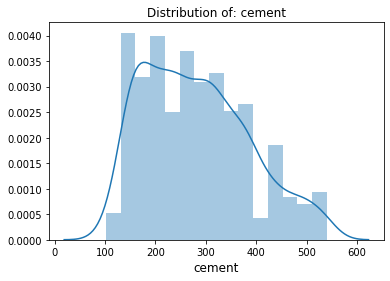

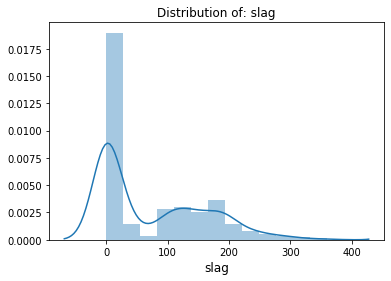

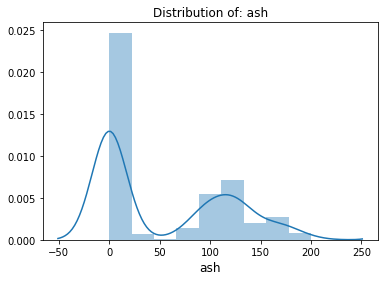

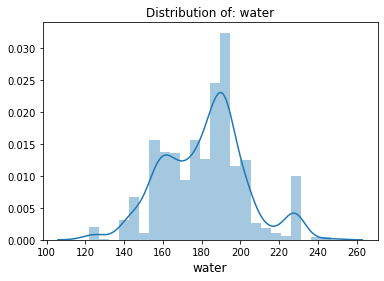

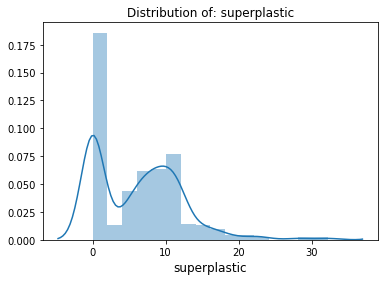

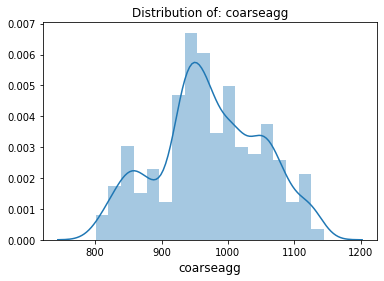

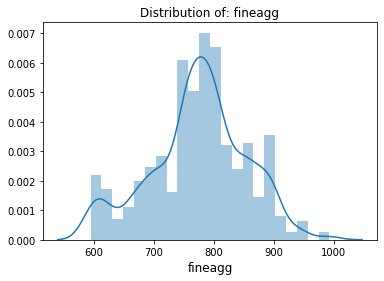

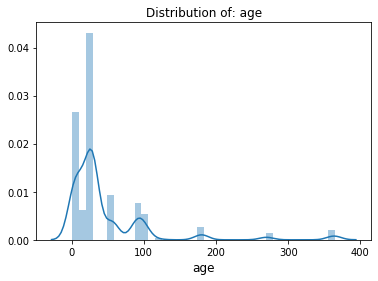

In [8]:
for i in range(len(concrete.columns)-1):
    sns.distplot(concrete[concrete.columns[i]])
    title1='Distribution of: '+concrete.columns[i]
    plt.title(title1)
    plt.xlabel(concrete.columns[i], fontsize=12)
    plt.show()

All the dimensions presented have multiple Gaussians which we can explore later. This could also be because 4 of the dimensions have 0 values which might indicate some kind of correlation.<br>
Further, 5 of the dimensions - Slag, Water, Superplastic, Fineaggregates and Age have outliers which could be truncated. <br> 
However, Age only has discrete outliers over 100 at 120, 180, 270, 360 and 365 days (6.2% of the total data)

### 2. Multi-variate analysis

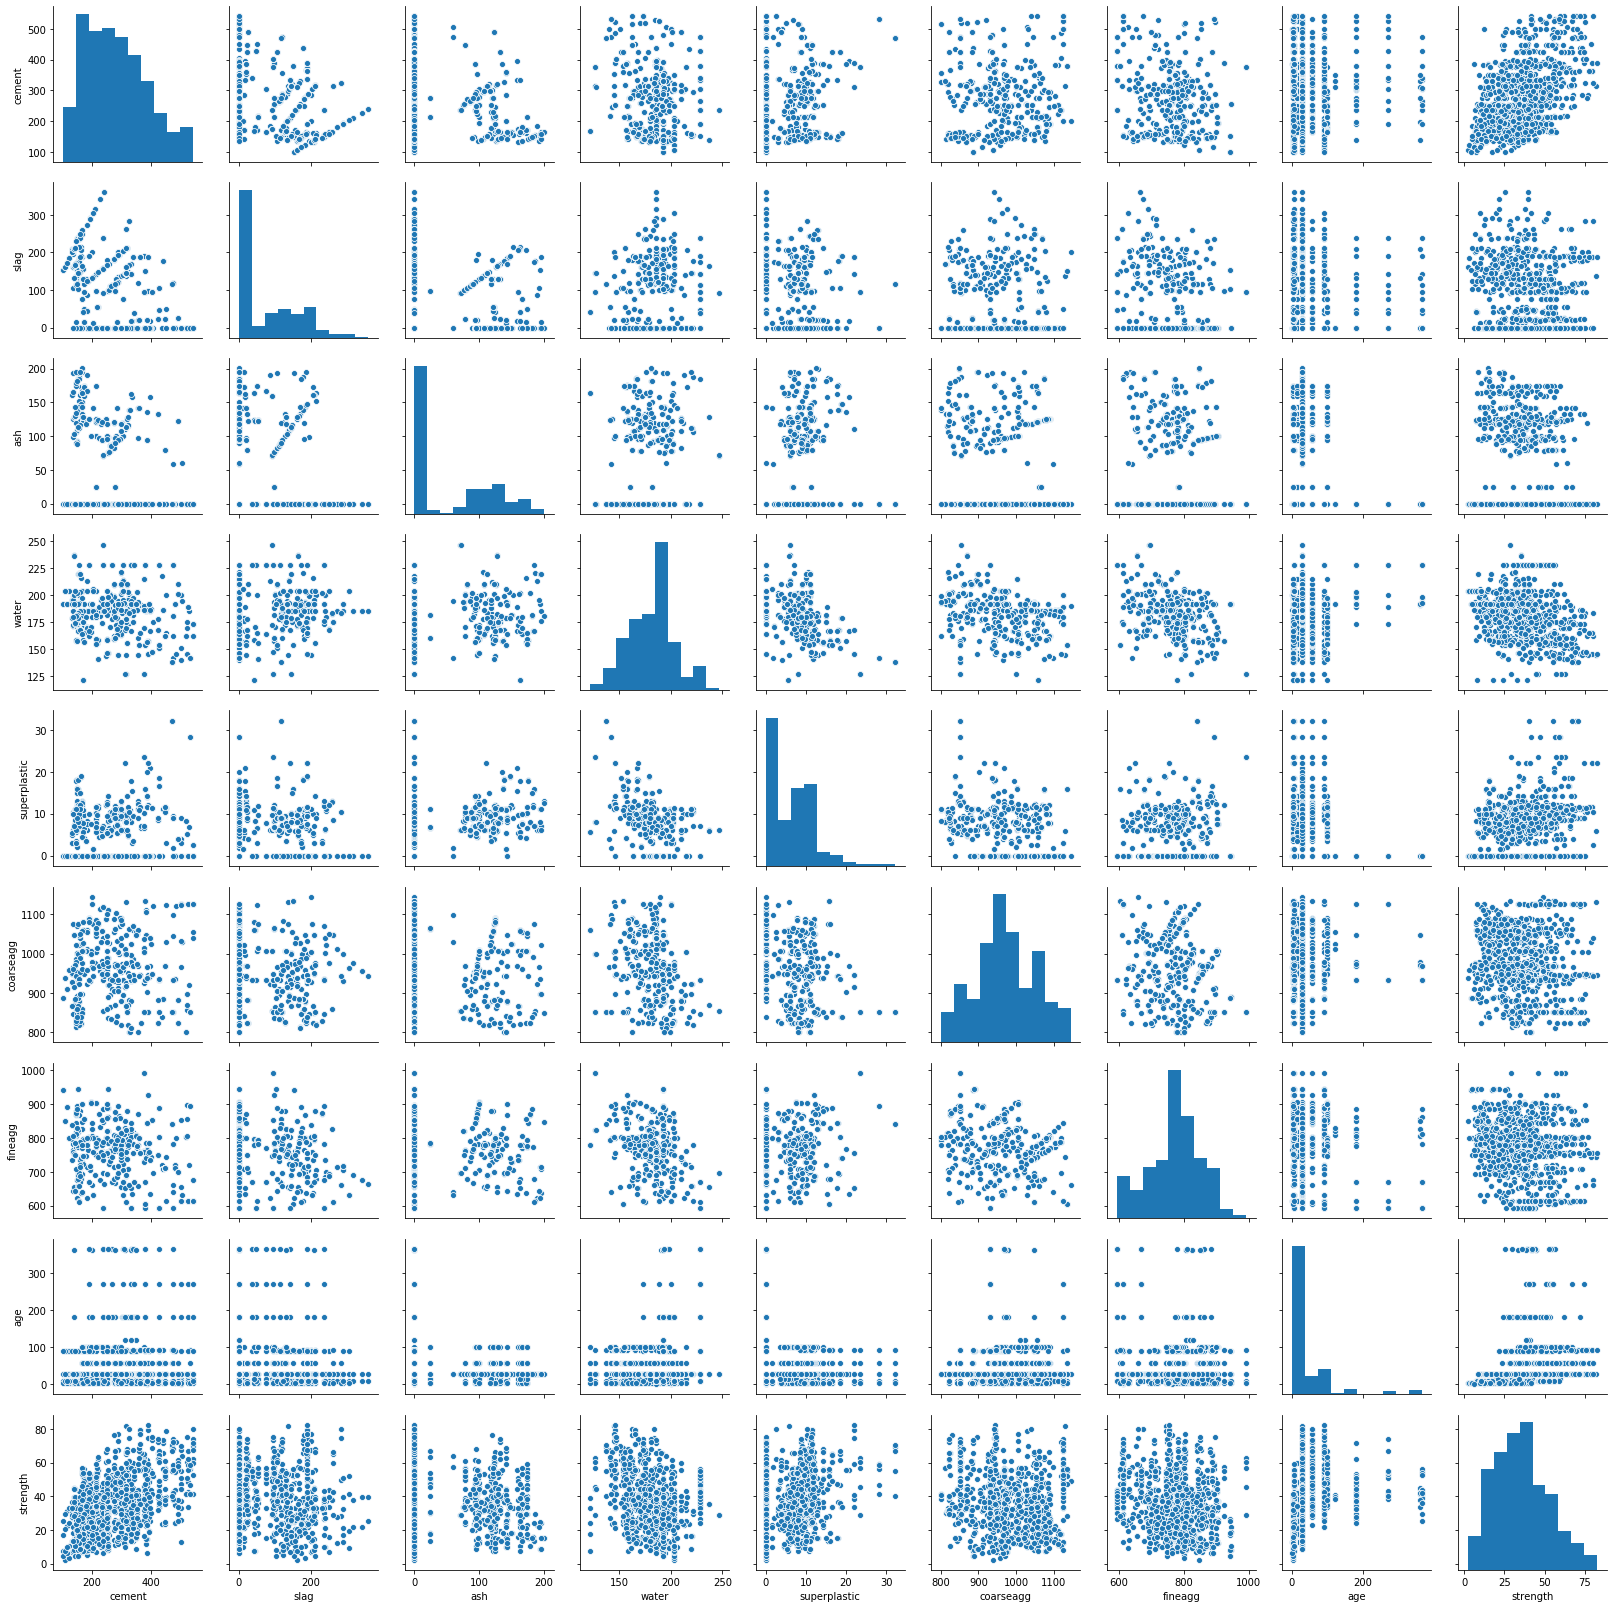

In [9]:
sns.pairplot(concrete)

As we can see, none of the dimensions seems to have any major correlations with each other. Hence, in this sense, we can use most of the features as is.

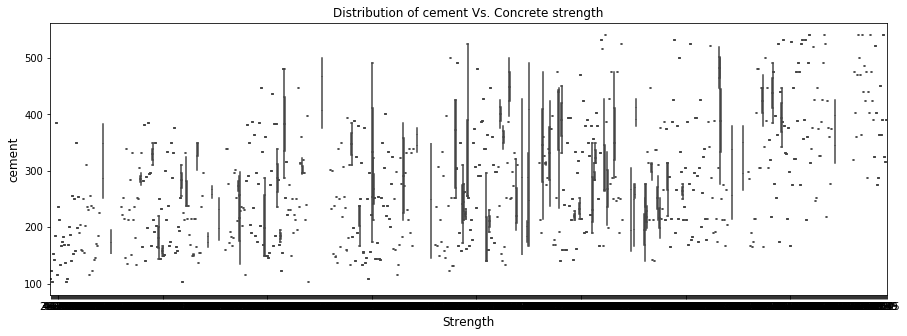

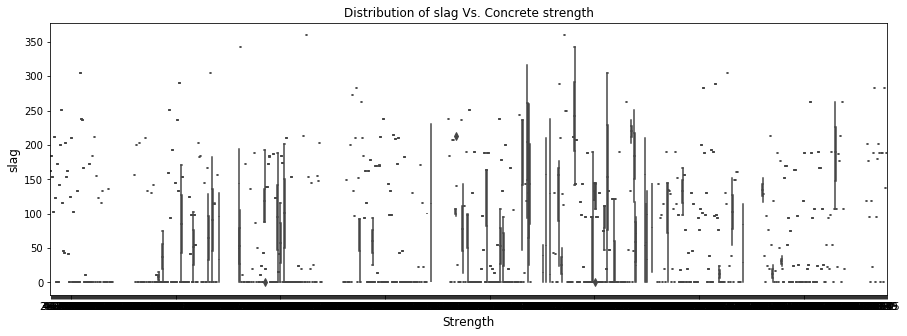

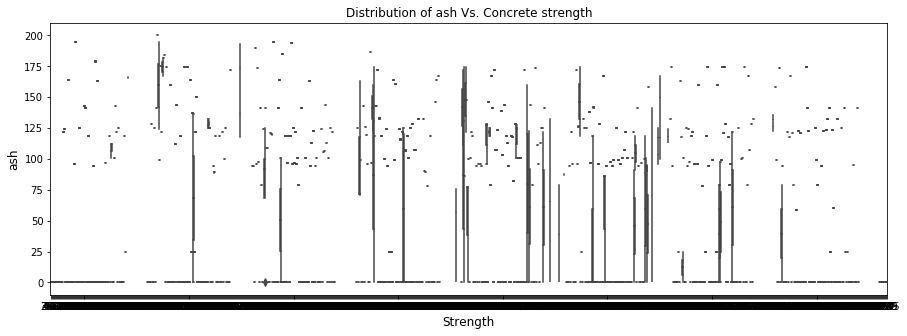

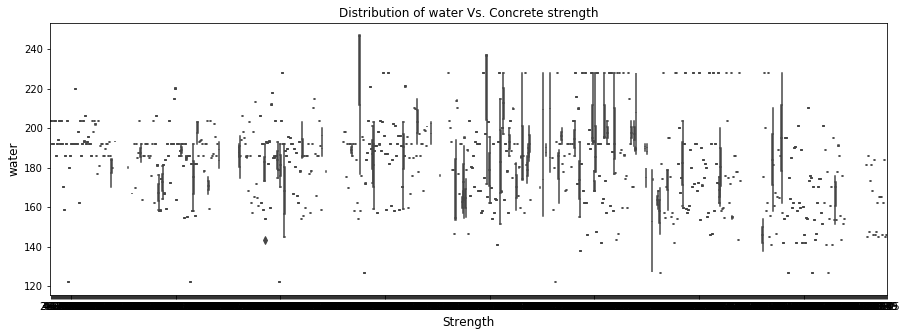

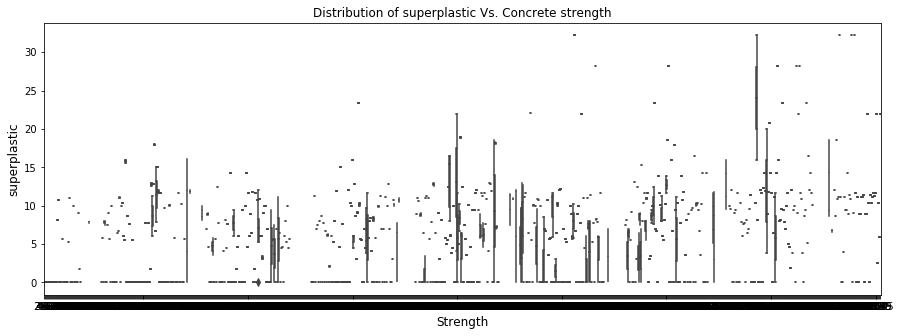

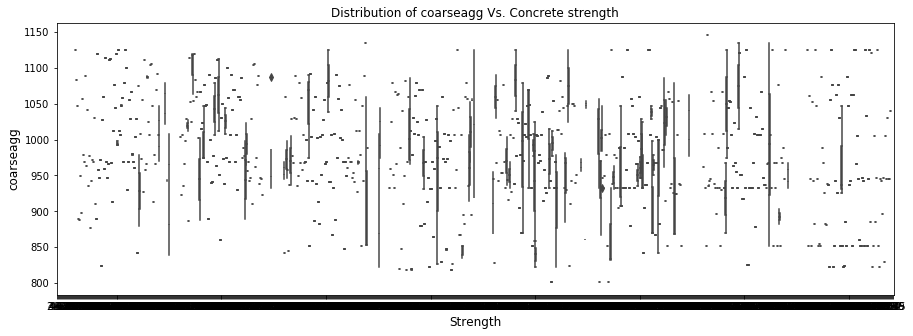

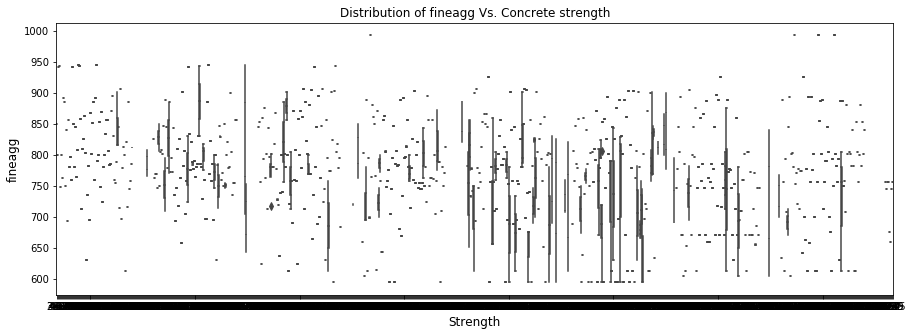

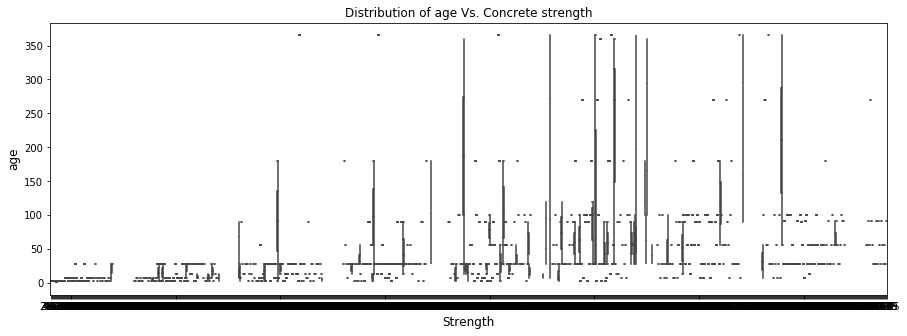

In [10]:
for i in range(len(concrete.columns)-1):
    g=sns.boxplot(y=concrete[concrete.columns[i]], x=concrete['strength'] )
    g.figure.set_size_inches(15,5)
    title1='Distribution of '
    title1=title1+concrete.columns[i]
    title1=title1+' Vs. Concrete strength'
    plt.title(title1)
    plt.ylabel(concrete.columns[i], fontsize=12)
    plt.xlabel('Strength', fontsize=12)
    plt.show()

None of the independent attributes seem to have a strong correlation with the compressive strength of the concrete. The graphs seem to represent the same. However, as a final check, we will check the pairwise correlation of the columns in the dataframe

In [239]:
concrete.corr(method='pearson')

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


As seen, none of the attributes have a strong correlation with the compressive strength of concrete,. In fact, none of the attributes seem to have a correlation of above 0.8 or less than 0.8 with any of the other variables. Hence, we may have to introduce additional attributes

## 2. Feature engineering techniques

For our modelling process, we will attempt three different datasets. One will be the base data, and the others will be additional composite features based on domain expertise

Based on domain research (https://theconstructor.org/concrete/factors-affecting-strength-of-concrete/6220/), creating a basket of additional dimensions to assess dependency of concrete strength to other parameters. Link to binder dependence: https://www.sciencedirect.com/science/article/abs/pii/S1674479910600180

In [11]:
concrete_mod=concrete.copy()

In [12]:
concrete_mod['water-cem-mix']=concrete['cement']/concrete['water']
concrete_mod['coarse-fine-mix']=concrete['coarseagg']/concrete['fineagg']
concrete_mod['binder-mix']=concrete['water']/(concrete['cement']+concrete['ash']+concrete['slag'])

In order to perform an end to end analysis, we will also use additional fields including a higher order component of all dimensions and ratios of all components

In [13]:
concrete_base = concrete.copy() # creating a backup before adding all other dimensions

We will also create a second modification which includes creation of multiple other dimensions to test

In [14]:
#df.loc[df['column_name'] == some_value]

concrete_mod2=concrete_mod.copy()

concrete_mod2['cement-slag-mix']=concrete_mod2['slag']/concrete_mod2['cement']
concrete_mod2['cement-ash-mix']=concrete_mod2['ash']/concrete_mod2['cement']
concrete_mod2['cement-superplastic-mix']=concrete_mod2['superplastic']/concrete_mod2['cement']
concrete_mod2['cement-coarsagg-mix']=concrete_mod2['cement']/concrete_mod2['coarseagg']
concrete_mod2['cement-fineagg-mix']=concrete_mod2['cement']/concrete_mod2['fineagg']
   

concrete_mod2['slag-water-mix']=concrete_mod2['slag']/concrete_mod2['water']

concrete_mod2['slag-coarseagg-mix']=concrete_mod2['slag']/concrete_mod2['coarseagg']
concrete_mod2['slag-fineagg-mix']=concrete_mod2['slag']/concrete_mod2['fineagg']
concrete_mod2['ash-water-mix']=concrete_mod2['ash']/concrete_mod2['water']

concrete_mod2['ash-coarseagg-mix']=concrete_mod2['ash']/concrete_mod2['coarseagg']
concrete_mod2['ash-fineagg-mix']=concrete_mod2['ash']/concrete_mod2['fineagg']

concrete_mod2['water-superplastic-mix']=concrete_mod2['superplastic']/concrete_mod2['water']

concrete_mod2['water-coarseagg-mix']=concrete_mod2['water']/concrete_mod2['coarseagg']
concrete_mod2['water-fineagg-mix']=concrete_mod2['water']/concrete_mod2['fineagg']
concrete_mod2['superplastic-coarseagg-mix']=concrete_mod2['superplastic']/concrete['coarseagg']
concrete_mod2['superplastic-fineagg-mix']=concrete_mod2['superplastic']/concrete['fineagg']

In [15]:
concrete_mod2['cement_square']=concrete_mod2['cement']**2
concrete_mod2['slag_square']=concrete_mod2['slag']**2
concrete_mod2['ash_square']=concrete_mod2['ash']**2
concrete_mod2['water_square']=concrete_mod2['water']**2
concrete_mod2['superplastic_square']=concrete_mod2['superplastic']**2
concrete_mod2['coarseagg_square']=concrete_mod2['coarseagg']**2
concrete_mod2['fineagg_square']=concrete_mod2['fineagg']**2
concrete_mod2['age_square']=concrete_mod2['age']**2

37 columns including second order dimensions may be too high. We will create a separate table and attempt to create a PCA for the same and check if it is effective

In [16]:
PCA_concrete = concrete_mod2.copy()

In [17]:
X = PCA_concrete.drop('strength', axis=1) # We are applying the Z score here only for the PCA. For the modelling, we will take the data again from the concrete df and not from this table
from scipy.stats import zscore
XScaled_PCA=X.apply(zscore)

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=8)
pca.fit(XScaled_PCA)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

[[ 1.00097182 -0.27548337 -0.39785361 ... -0.09950125 -0.20983937
   0.08484871]
 [-0.27548337  1.00097182 -0.32389436 ... -0.28840903 -0.27854686
  -0.03331448]
 [-0.39785361 -0.32389436  1.00097182 ... -0.00788512  0.06545008
  -0.17437039]
 ...
 [-0.09950125 -0.28840903 -0.00788512 ...  1.00097182 -0.19113953
  -0.01373356]
 [-0.20983937 -0.27854686  0.06545008 ... -0.19113953  1.00097182
  -0.14808145]
 [ 0.08484871 -0.03331448 -0.17437039 ... -0.01373356 -0.14808145
   1.00097182]]


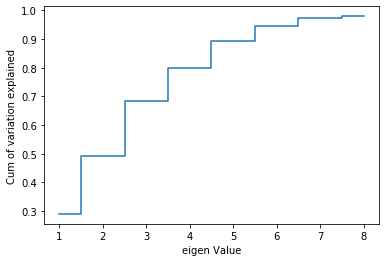

In [20]:
covMatrix = np.cov(XScaled_PCA,rowvar=False)
print(covMatrix)
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

We will try to use the PCA input data separately during the modelling

## 3. Modelling

### Scenario 1: Base Data

#### A. Train, validate and test split (Train: 70% of the data, Validate: 15% of the data , Test: 15% of the data

In [21]:
X = concrete.drop('strength', axis=1)
y = concrete['strength']

In [22]:
from sklearn.model_selection import train_test_split
#X_dump, X_test, y_dump, y_test = train_test_split(X, Y, test_size=0.15, random_state=3)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=3)

#### B. Data Transformation and Truncation

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 550 to 952
Data columns (total 8 columns):
cement          721 non-null float64
slag            721 non-null float64
ash             721 non-null float64
water           721 non-null float64
superplastic    721 non-null float64
coarseagg       721 non-null float64
fineagg         721 non-null float64
age             721 non-null int64
dtypes: float64(7), int64(1)
memory usage: 50.7 KB


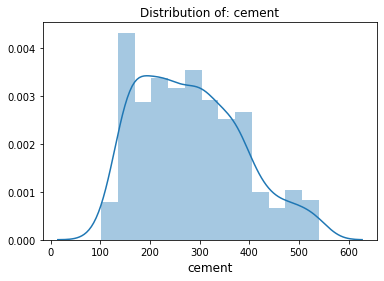

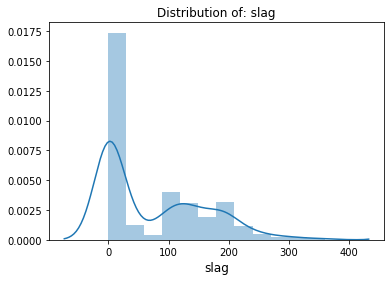

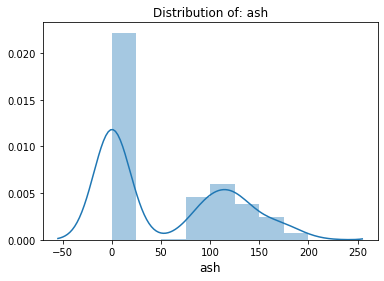

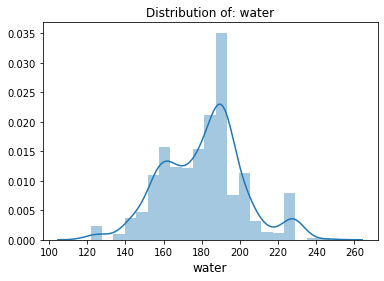

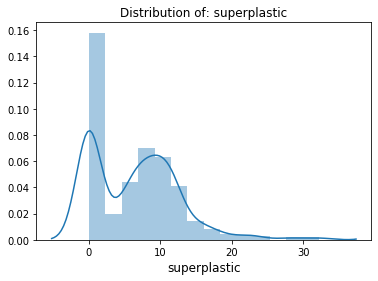

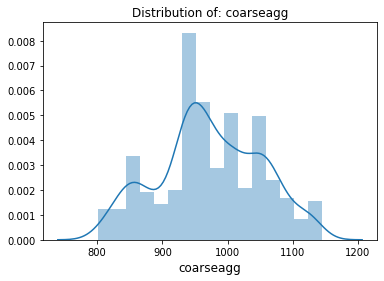

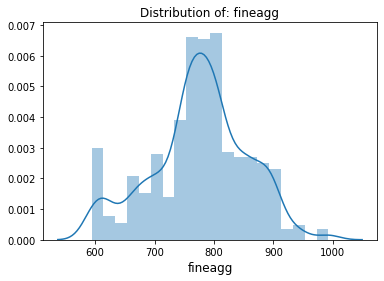

In [24]:
for i in range(len(X_train.columns)-1):
    sns.distplot(X_train[X_train.columns[i]])
    title1='Distribution of: '+X_train.columns[i]
    plt.title(title1)
    plt.xlabel(X_train.columns[i], fontsize=12)
    plt.show()

There still seem to be a large number of outliers. Hence, we will truncate the data across all the relevant dimensions

In [25]:
X_train.loc[X_train['slag'] > 260, 'slag'] = 260
X_train.loc[X_train['ash'] > 175, 'ash'] = 175
X_train.loc[X_train['water'] > 235, 'water'] = 235
X_train.loc[X_train['superplastic'] > 18, 'superplastic'] = 18
X_train.loc[X_train['fineagg'] > 915, 'fineagg'] = 915
X_train.loc[X_train['age'] > 190, 'age'] = 190
# X_train.loc[X_train['coarse-fine-mix'] > 1.8, 'coarse-fine-mix'] = 1.8
# X_train.loc[X_train['binder-mix'] > 0.82, 'binder-mix'] = 0.82
# X_train.loc[X_train['cement-slag-mix'] > 1.2, 'cement-slag-mix'] = 1.2
# X_train.loc[X_train['cement-ash-mix'] > 1.1, 'cement-ash-mix'] = 1.1
# X_train.loc[X_train['cement-superplastic-mix'] > .08, 'cement-superplastic-mix'] = 0.08
# X_train.loc[X_train['cement-coarsagg-mix'] > .58, 'cement-coarsagg-mix'] = 0.58
# X_train.loc[X_train['cement-fineagg-mix'] > 0.7, 'cement-fineagg-mix'] = 0.7
# X_train.loc[X_train['slag-water-mix'] > 1.5, 'slag-water-mix'] = 1.5
# X_train.loc[X_train['slag-coarseagg-mix'] > 0.3, 'slag-coarseagg-mix'] = 0.3
# X_train.loc[X_train['slag-fineagg-mix'] > 0.29, 'slag-fineagg-mix'] = 0.29
# X_train.loc[X_train['ash-water-mix'] > 1.2, 'ash-water-mix'] = 1.2
# X_train.loc[X_train['ash-coarseagg-mix'] > 0.18, 'ash-coarseagg-mix'] = 0.18
# X_train.loc[X_train['ash-fineagg-mix'] > 0.24, 'ash-fineagg-mix'] = 0.24
# X_train.loc[X_train['water-superplastic-mix'] > 0.11, 'water-superplastic-mix'] = 0.11
# X_train.loc[X_train['water-coarseagg-mix'] > 0.25, 'water-coarseagg-mix'] = 0.25
# X_train.loc[X_train['water-coarseagg-mix'] < 0.13, 'water-coarseagg-mix'] = 0.13
# X_train.loc[X_train['water-fineagg-mix'] > 0.32, 'water-fineagg-mix'] = 0.32
# X_train.loc[X_train['water-fineagg-mix'] < 0.17, 'water-fineagg-mix'] = 0.17
# X_train.loc[X_train['superplastic-coarseagg-mix'] >0.15, 'superplastic-coarseagg-mix'] = 0.15
# X_train.loc[X_train['superplastic-fineagg-mix'] >0.02, 'superplastic-fineagg-mix'] = 0.02


In [26]:
from scipy.stats import zscore
X_train_scaled=X_train.apply(zscore)
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
550,-1.613376,1.200648,-0.867759,0.530463,-1.126464,-0.797071,1.489466,-0.851532
974,-0.663156,-0.879450,1.869006,-1.030808,0.998807,0.913440,-0.033425,-0.288540
773,1.154445,-0.879450,-0.867759,0.292464,-1.126464,0.675656,-0.374807,-0.761454
261,0.277319,-0.879450,-0.867759,0.530463,-1.126464,0.509463,0.703908,-0.761454
294,-0.422433,1.029911,-0.867759,0.230585,-1.126464,0.875088,-0.510598,-0.288540


#### Preparing the PCA training set

In [27]:
# ADD THIS AFTER TRAIN SET IS EXTRACTED
pca7 = PCA(n_components=7)
pca7.fit(X_train)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
X_train_PCA = pca7.transform(X_train)

[[ 9.14879126e-01 -2.37715225e-01 -2.53916290e-01 -8.99670971e-04
  -2.74566304e-03 -6.90430295e-03 -1.98657263e-01  4.99344479e-02]
 [ 2.63308036e-02  7.85622449e-01 -2.96746383e-01  7.19766433e-02
  -3.25793230e-03 -3.29337312e-01 -4.24437212e-01  1.56325809e-02]
 [-1.34656314e-01 -1.75516789e-02  1.82005432e-02  4.51272347e-02
  -2.10075688e-02  7.58375373e-01 -6.31722442e-01  6.74100983e-02]
 [ 3.20749928e-02 -1.97736000e-01  7.09435442e-01  5.96319490e-02
   2.37023387e-02 -4.41571684e-01 -5.07413474e-01  1.12603386e-03]
 [-1.63885866e-01 -1.93332579e-01 -1.92643124e-01  1.97915152e-01
  -3.79832986e-02 -1.58537275e-01 -4.28877414e-02  9.11628213e-01]
 [-2.80243061e-01 -4.41791701e-01 -4.75849608e-01  4.54213703e-01
  -9.66660977e-02 -2.48195137e-01 -2.46894471e-01 -4.02043458e-01]
 [ 1.94273183e-01  2.33074784e-01  2.82739009e-01  8.35650681e-01
  -1.87739971e-01  1.83592579e-01  2.46425469e-01 -1.61986225e-03]]
[0.33735342 0.25745204 0.19976941 0.11533606 0.05733401 0.03036477
 

The PCA data set has very low values in its data set and hence we will ignore this data set

We will now develop all the models using X_train_scaled only

#### Linear Regression (Linear , On X_train_scaled)

In [28]:
X_train_scaled.shape

(721, 8)

In [29]:
X_test.shape

(309, 8)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression_model_linear_xtrain = LinearRegression()
regression_model_linear_xtrain.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [32]:
regression_model_linear_xtrain.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(regression_model_linear_xtrain.coef_))], axis = 1)
coefficients

,0,0
0,cement,12.247306
1,slag,9.006763
2,ash,5.730269
3,water,-2.848554
4,superplastic,1.913963
5,coarseagg,1.480030
6,fineagg,1.604213
7,age,8.736777


In [34]:
y_pred_linear = regression_model_linear_xtrain.predict(X_test)

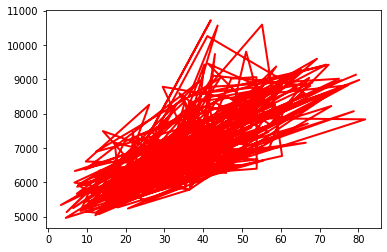

In [35]:
plt.plot(y_test, y_pred_linear, color='red', linewidth=2)
plt.show()

In [36]:
n=721
p=8
R2=r2_score(y_test, y_pred_linear,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_linear,multioutput='variance_weighted'))
print('Adjusted R2 score is: ',adj_R2)

R2 score is: -172384.0990097028
Adjusted R2 score is:  -174321.0102345309


In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

Mean Absolute Error: 6962.520713246696
Mean Squared Error: 49953583.78870813
Root Mean Squared Error: 7067.784928017273


#### Linear regression with quadratic powers

In [38]:
X_quad=X_train_scaled.iloc[:,:27].copy()
Xtest_quad=X_test.iloc[:,:27].copy()

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [40]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [41]:
X_train_ = poly.fit_transform(X_quad)
X_test_ = poly.fit_transform(Xtest_quad)

In [42]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train_, y_train)
y_pred_quad = poly_clf.predict(X_test_)

In [43]:
n=721
p=8
R2=r2_score(y_test, y_pred_linear,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_quad,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -1381658065.1260893
Adjusted R2 score is: -174321.0102345309


In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_quad))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_quad))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_quad)))

Mean Absolute Error: 548573.4432511352
Mean Squared Error: 400375510238.7897
Root Mean Squared Error: 632752.3293033299


#### Linear Regression (Ridge Regularization)

In [45]:
from sklearn.linear_model import Ridge

In [46]:
rid_reg=Ridge(alpha=1040000000)
rid_reg.fit(X_train_scaled,y_train)

Ridge(alpha=1040000000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [47]:
y_pred_rid=rid_reg.predict(X_test)

In [48]:
n=721
p=8
R2=r2_score(y_test, y_pred_quad,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_quad,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -1381658065.1260893
Adjusted R2 score is: -1397182313.0600903


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rid))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rid))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rid)))

Mean Absolute Error: 13.61479304268721
Mean Squared Error: 289.7860270589322
Root Mean Squared Error: 17.023102744768128


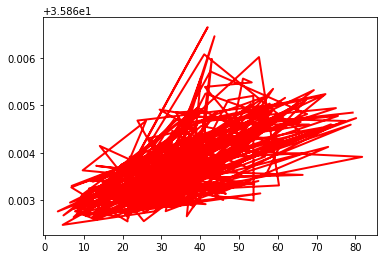

In [50]:
plt.plot(y_test, y_pred_rid, color='red', linewidth=2)
plt.show()

Using a very large alpha value in Ridge regression has significantly reduced the error of the model.

In [51]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(rid_reg.coef_))], axis = 1)
coefficients.columns=['Dimension','Coeffecients']
coefficients
coefficients.sort_values('Coeffecients', ascending='False')

,Dimension,Coeffecients
3,water,-0.000003
6,fineagg,-0.000002
5,coarseagg,-0.000002
2,ash,-0.000001
1,slag,0.000002
4,superplastic,0.000004
7,age,0.000005
0,cement,0.000006


#### Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree_R = DecisionTreeRegressor()

In [53]:
Decision_tree_R.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [54]:
y_pred_DT = Decision_tree_R.predict(X_test)

In [56]:
n=721
p=8
R2=r2_score(y_test, y_pred_DT,multioutput='variance_weighted')
adj_R2=1-(1-R2)*(n-1)/(n-p-1)
print('R2 score is:',r2_score(y_test, y_pred_DT,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -1.9684861671387726
Adjusted R2 score is: -2.001839944297635


In [57]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_DT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))

Mean Absolute Error: 25.77601941747573
Mean Squared Error: 860.2049906148868
Root Mean Squared Error: 29.3292514499584


#### Support Vector Machine

In [58]:
from sklearn import svm
svr= svm.SVR()

In [59]:
svr.fit(X_train_scaled, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [60]:
y_pred_SVR=svr.predict(X_test)

In [61]:
n=721
p=8
R2=r2_score(y_test, y_pred_SVR,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_SVR,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.0026722675890924474
Adjusted R2 score is: -0.013938248123801289


In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_SVR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SVR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)))

Mean Absolute Error: 13.662235724095213
Mean Squared Error: 290.5533797257414
Root Mean Squared Error: 17.045626410482583


#### Random Forest Regression

In [63]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [64]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [65]:
y_pred_rfr=rfr.predict(X_test)

In [66]:
n=721
p=8
R2=r2_score(y_test, y_pred_rfr,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_rfr,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -2.419779739541685
Adjusted R2 score is: -2.458204230997209


In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 27.96471197411004
Mean Squared Error: 990.980396446602
Root Mean Squared Error: 31.479841112156237


#### AdaBoost Regression

In [68]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [69]:
abr.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [70]:
y_pred_abr=abr.predict(X_test)

In [71]:
n=721
p=8
R2=r2_score(y_test, y_pred_abr,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_abr,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -1.5513585908133005
Adjusted R2 score is: -1.580025541271877


In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_abr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_abr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_abr)))

Mean Absolute Error: 23.77416483795628
Mean Squared Error: 739.330173393113
Root Mean Squared Error: 27.19062657227878


#### XGBoost Regression

In [73]:
from xgboost import XGBRegressor
xgb=XGBRegressor()


In [74]:
xgb.fit(X_train_scaled, y_train)

[18:13:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [75]:
y_pred_xgb=xgb.predict(X_test)

In [81]:
n=721
p=8
R2=r2_score(y_test, y_pred_xgb,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_xgb,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -1.3693911562597219
Adjusted R2 score is: -1.3960135288019657


In [82]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error: 22.73301497820512
Mean Squared Error: 686.5998298715025
Root Mean Squared Error: 26.203050010857563


Hence, for **the base data**, the best model provided is:<br>
Model: **Support Vector Machines**<br>
Mean Absolute Error: 13.760672880386117<br>
Mean Squared Error: 292.6291292432664<br>
Root Mean Squared Error: 17.1064060878744<br>

### Scenario 2: Mod 1

#### A. Train, validate and test split (Train: 70% of the data, Validate: 15% of the data , Test: 15% of the data

In [83]:
X = concrete_mod.drop('strength', axis=1)
Y = concrete_mod['strength']

In [84]:
from sklearn.model_selection import train_test_split
#X_dump, X_test, y_dump, y_test = train_test_split(X, Y, test_size=0.15, random_state=3)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=3)

#### B. Data Transformation and Truncation

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 550 to 952
Data columns (total 11 columns):
cement             721 non-null float64
slag               721 non-null float64
ash                721 non-null float64
water              721 non-null float64
superplastic       721 non-null float64
coarseagg          721 non-null float64
fineagg            721 non-null float64
age                721 non-null int64
water-cem-mix      721 non-null float64
coarse-fine-mix    721 non-null float64
binder-mix         721 non-null float64
dtypes: float64(10), int64(1)
memory usage: 67.6 KB


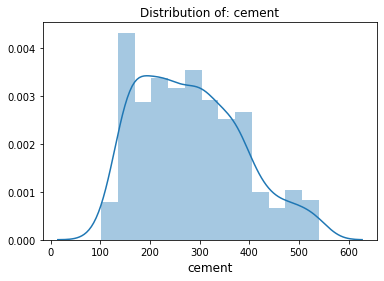

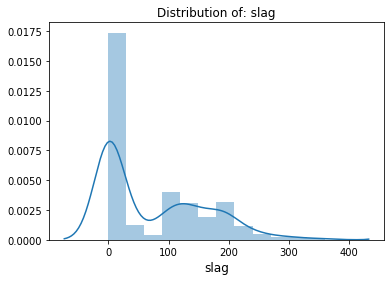

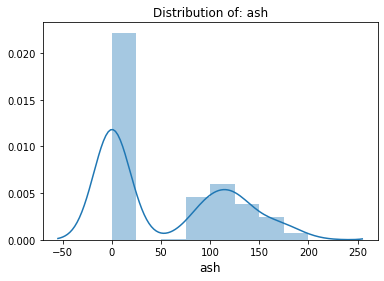

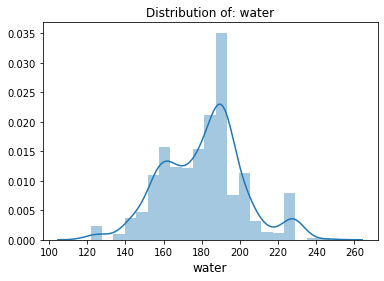

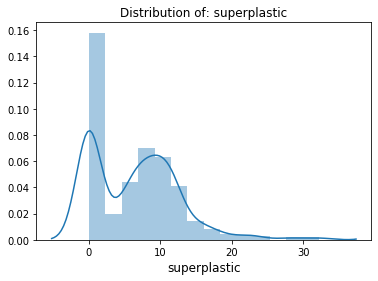

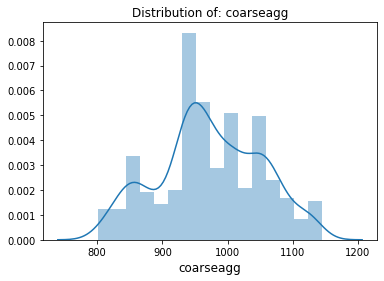

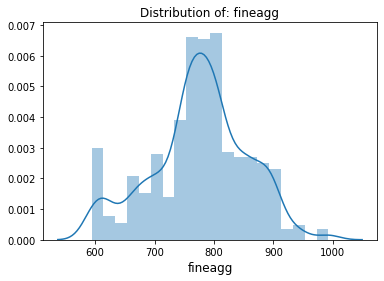

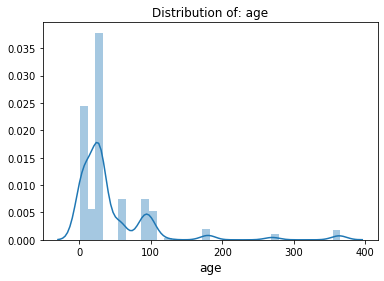

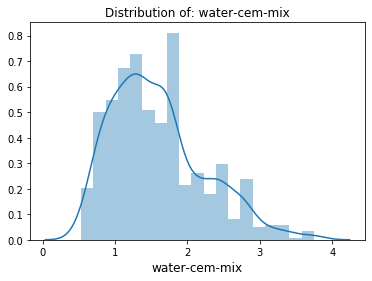

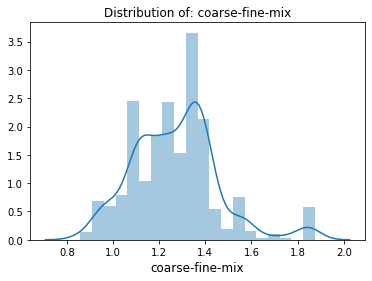

In [86]:
for i in range(len(X_train.columns)-1):
    sns.distplot(X_train[X_train.columns[i]])
    title1='Distribution of: '+X_train.columns[i]
    plt.title(title1)
    plt.xlabel(X_train.columns[i], fontsize=12)
    plt.show()

There still seem to be a large number of outliers. Hence, we will truncate the data across all the relevant dimensions

In [87]:
X_train.loc[X_train['slag'] > 260, 'slag'] = 260
X_train.loc[X_train['ash'] > 175, 'ash'] = 175
X_train.loc[X_train['water'] > 235, 'water'] = 235
X_train.loc[X_train['superplastic'] > 18, 'superplastic'] = 18
X_train.loc[X_train['fineagg'] > 915, 'fineagg'] = 915
X_train.loc[X_train['age'] > 190, 'age'] = 190
X_train.loc[X_train['coarse-fine-mix'] > 1.8, 'coarse-fine-mix'] = 1.8
X_train.loc[X_train['binder-mix'] > 0.82, 'binder-mix'] = 0.82
# X_train.loc[X_train['cement-slag-mix'] > 1.2, 'cement-slag-mix'] = 1.2
# X_train.loc[X_train['cement-ash-mix'] > 1.1, 'cement-ash-mix'] = 1.1
# X_train.loc[X_train['cement-superplastic-mix'] > .08, 'cement-superplastic-mix'] = 0.08
# X_train.loc[X_train['cement-coarsagg-mix'] > .58, 'cement-coarsagg-mix'] = 0.58
# X_train.loc[X_train['cement-fineagg-mix'] > 0.7, 'cement-fineagg-mix'] = 0.7
# X_train.loc[X_train['slag-water-mix'] > 1.5, 'slag-water-mix'] = 1.5
# X_train.loc[X_train['slag-coarseagg-mix'] > 0.3, 'slag-coarseagg-mix'] = 0.3
# X_train.loc[X_train['slag-fineagg-mix'] > 0.29, 'slag-fineagg-mix'] = 0.29
# X_train.loc[X_train['ash-water-mix'] > 1.2, 'ash-water-mix'] = 1.2
# X_train.loc[X_train['ash-coarseagg-mix'] > 0.18, 'ash-coarseagg-mix'] = 0.18
# X_train.loc[X_train['ash-fineagg-mix'] > 0.24, 'ash-fineagg-mix'] = 0.24
# X_train.loc[X_train['water-superplastic-mix'] > 0.11, 'water-superplastic-mix'] = 0.11
# X_train.loc[X_train['water-coarseagg-mix'] > 0.25, 'water-coarseagg-mix'] = 0.25
# X_train.loc[X_train['water-coarseagg-mix'] < 0.13, 'water-coarseagg-mix'] = 0.13
# X_train.loc[X_train['water-fineagg-mix'] > 0.32, 'water-fineagg-mix'] = 0.32
# X_train.loc[X_train['water-fineagg-mix'] < 0.17, 'water-fineagg-mix'] = 0.17
# X_train.loc[X_train['superplastic-coarseagg-mix'] >0.15, 'superplastic-coarseagg-mix'] = 0.15
# X_train.loc[X_train['superplastic-fineagg-mix'] >0.02, 'superplastic-fineagg-mix'] = 0.02


In [88]:
from scipy.stats import zscore
X_train_scaled=X_train.apply(zscore)
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water-cem-mix,coarse-fine-mix,binder-mix
550,-1.613376,1.200648,-0.867759,0.530463,-1.126464,-0.797071,1.489466,-0.851532,-1.529243,-1.356493,1.628299
974,-0.663156,-0.879450,1.869006,-1.030808,0.998807,0.913440,-0.033425,-0.288540,-0.383040,0.454339,-0.436109
773,1.154445,-0.879450,-0.867759,0.292464,-1.126464,0.675656,-0.374807,-0.761454,0.858110,0.584458,0.026620
261,0.277319,-0.879450,-0.867759,0.530463,-1.126464,0.509463,0.703908,-0.761454,0.042369,-0.269688,1.262132
294,-0.422433,1.029911,-0.867759,0.230585,-1.126464,0.875088,-0.510598,-0.288540,-0.473823,0.809738,0.028721


#### Preparing the PCA training set

In [89]:
# ADD THIS AFTER TRAIN SET IS EXTRACTED
pca7 = PCA(n_components=7)
pca7.fit(X_train)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
X_train_PCA = pca7.transform(X_train)

[[ 9.14869295e-01 -2.37712434e-01 -2.53910753e-01 -9.02733953e-04
  -2.74493817e-03 -6.90915514e-03 -1.98645110e-01  4.99315089e-02
   5.18413058e-03  3.70689478e-04 -4.09387923e-04]
 [ 2.63345611e-02  7.85621033e-01 -2.96747242e-01  7.19768676e-02
  -3.25802183e-03 -3.29334904e-01 -4.24440414e-01  1.56330762e-02
  -2.66638848e-04  3.17723180e-04 -4.06379633e-04]
 [-1.34640713e-01 -1.75605842e-02  1.81973707e-02  4.51280846e-02
  -2.10077560e-02  7.58372862e-01 -6.31723279e-01  6.74115302e-02
  -1.50535793e-03  2.04467585e-03  1.72577635e-04]
 [ 3.20781074e-02 -1.97737674e-01  7.09434190e-01  5.96321780e-02
   2.37022889e-02 -4.41573621e-01 -5.07412031e-01  1.12640934e-03
  -4.84951119e-04  2.61838525e-04 -5.81884045e-04]
 [-1.63873876e-01 -1.93345355e-01 -1.92657980e-01  1.97924633e-01
  -3.79854090e-02 -1.58545694e-01 -4.28917296e-02  9.11615798e-01
  -2.79070810e-03 -9.21487680e-05  1.08650998e-03]
 [-2.80195694e-01 -4.41781777e-01 -4.75840861e-01  4.54198550e-01
  -9.66632400e-02 -

The PCA data set has very low values in its data set and hence we will ignore this data set

We will now develop all the models using both X_train_scaled only

#### Linear Regression (Linear , On X_train_scaled)

In [90]:
X_train_scaled.shape

(721, 11)

In [91]:
X_test.shape

(309, 11)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
regression_model_linear_xtrain = LinearRegression()
regression_model_linear_xtrain.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [94]:
regression_model_linear_xtrain.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(regression_model_linear_xtrain.coef_))], axis = 1)
coefficients

,0,0
0,cement,14.996448
1,slag,7.688337
2,ash,4.120988
3,water,-3.429224
4,superplastic,2.323437
5,coarseagg,7.482975
6,fineagg,-6.390642
7,age,8.867750
8,water-cem-mix,-4.689398
9,coarse-fine-mix,-11.144754


In [96]:
y_pred_linear = regression_model_linear_xtrain.predict(X_test)

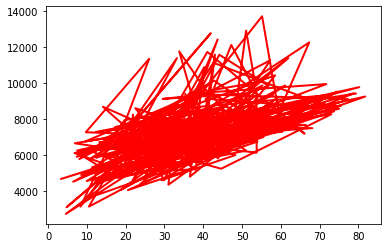

In [97]:
plt.plot(y_test, y_pred_linear, color='red', linewidth=2)
plt.show()

In [98]:
n=721
p=11
R2=r2_score(y_test, y_pred_linear,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_xgb))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -1.3693911562597219
Adjusted R2 score is: -190208.5461115154


In [99]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

Mean Absolute Error: 7134.694359559506
Mean Squared Error: 54276642.69447897
Root Mean Squared Error: 7367.268333275161


#### Linear regression with quadratic powers

In [100]:
X_quad=X_train_scaled.iloc[:,:27].copy()
Xtest_quad=X_test.iloc[:,:27].copy()

In [101]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [102]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [103]:
X_train_ = poly.fit_transform(X_quad)
X_test_ = poly.fit_transform(Xtest_quad)

In [104]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train_, y_train)
y_pred_quad = poly_clf.predict(X_test_)

In [105]:
n=721
p=11
R2=r2_score(y_test, y_pred_quad,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_quad,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -301950549469.0726
Adjusted R2 score is: -306635254749.9905


In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_quad))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_quad))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_quad)))

Mean Absolute Error: 9148472.874030888
Mean Squared Error: 87498932098247.92
Root Mean Squared Error: 9354086.385010988


#### Linear Regression (Ridge Regularization)

In [107]:
from sklearn.linear_model import Ridge

In [108]:
rid_reg=Ridge(alpha=1040000000)
rid_reg.fit(X_train_scaled,y_train)

Ridge(alpha=1040000000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [109]:
y_pred_rid=rid_reg.predict(X_test)

In [110]:
n=721
p=11
R2=r2_score(y_test, y_pred_rid,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_rid,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -2.3853453923194934e-05
Adjusted R2 score is: -0.015539033126692248


In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rid))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rid))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rid)))

Mean Absolute Error: 13.614790908059485
Mean Squared Error: 289.78592489253145
Root Mean Squared Error: 17.02309974395179


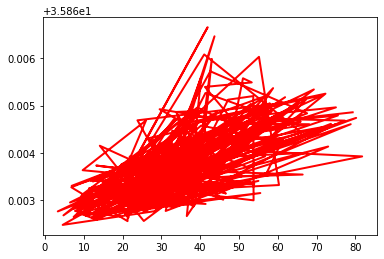

In [112]:
plt.plot(y_test, y_pred_rid, color='red', linewidth=2)
plt.show()

Using a very large alpha value in Ridge regression has significantly reduced the error of the model.

In [113]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(rid_reg.coef_))], axis = 1)
coefficients.columns=['Dimension','Coeffecients']
coefficients
coefficients.sort_values('Coeffecients', ascending='False')

,Dimension,Coeffecients
10,binder-mix,-6.960124e-06
3,water,-3.314524e-06
6,fineagg,-2.010049e-06
5,coarseagg,-1.787373e-06
2,ash,-1.105802e-06
9,coarse-fine-mix,6.077731e-07
1,slag,1.585806e-06
4,superplastic,4.088778e-06
7,age,5.027021e-06
0,cement,5.590200e-06


#### Decision Tree Regression

In [114]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree_R = DecisionTreeRegressor()

In [115]:
Decision_tree_R.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [116]:
y_pred_DT = Decision_tree_R.predict(X_test)

In [117]:
n=721
p=11
R2=r2_score(y_test, y_pred_DT,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_DT,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.24940438023120237
Adjusted R2 score is: 0.23775903211067095


In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_DT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))

Mean Absolute Error: 12.022912621359223
Mean Squared Error: 217.50685760517803
Root Mean Squared Error: 14.748113696509735


#### Support Vector Machine

In [119]:
from sklearn import svm
svr= svm.SVR()

In [120]:
svr.fit(X_train_scaled, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [121]:
y_pred_SVR=svr.predict(X_test)

In [122]:
n=721
p=11
R2=r2_score(y_test, y_pred_SVR,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_SVR,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.0019215160091876626
Adjusted R2 score is: -0.01746613755516946


In [123]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_SVR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SVR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)))

Mean Absolute Error: 13.648643536107883
Mean Squared Error: 290.33582767416203
Root Mean Squared Error: 17.039243753000367


#### Random Forest Regression

In [124]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [125]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [126]:
y_pred_rfr=rfr.predict(X_test)

In [127]:
n=721
p=11
R2=r2_score(y_test, y_pred_rfr,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_rfr,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.05199225729777879
Adjusted R2 score is: 0.03728409767898544


In [128]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 13.614161812297734
Mean Squared Error: 274.71274767637533
Root Mean Squared Error: 16.574460705446054


#### AdaBoost Regression

In [129]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [130]:
abr.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [131]:
y_pred_abr=abr.predict(X_test)

In [132]:
n=721
p=11
R2=r2_score(y_test, y_pred_abr,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_abr,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.5210237659010333
Adjusted R2 score is: -0.5446221600123329


In [133]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_abr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_abr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_abr)))

Mean Absolute Error: 17.870004859033006
Mean Squared Error: 440.76076511855024
Root Mean Squared Error: 20.99430315867974


#### XGBoost Regression

In [134]:
from xgboost import XGBRegressor
xgb=XGBRegressor()


In [135]:
xgb.fit(X_train_scaled, y_train)

[18:16:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [136]:
y_pred_xgb=xgb.predict(X_test)

In [137]:
n=721
p=11
R2=r2_score(y_test, y_pred_xgb,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_xgb,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -2.2096415535038343
Adjusted R2 score is: -2.2594385310617215


In [138]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error: 26.733727865867245
Mean Squared Error: 930.086760373927
Root Mean Squared Error: 30.497323823147614


Hence, for **the first modification**, the best model provided is:<br>
Model: **Support Vector Machines**<br>
Mean Absolute Error: 13.648643536107883<br>
Mean Squared Error: 290.33582767416203<br>
Root Mean Squared Error: 17.039243753000367<br>

### Scenario 3: Modification2

#### A. Train, validate and test split (Train: 70% of the data, Validate: 15% of the data , Test: 15% of the data

In [139]:
X = concrete_mod2.drop('strength', axis=1)
Y = concrete_mod2['strength']

In [142]:
from sklearn.model_selection import train_test_split
#X_dump, X_test, y_dump, y_test = train_test_split(X, Y, test_size=0.15, random_state=3)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=3)

#### B. Data Transformation and Truncation

In [143]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 550 to 952
Data columns (total 35 columns):
cement                        721 non-null float64
slag                          721 non-null float64
ash                           721 non-null float64
water                         721 non-null float64
superplastic                  721 non-null float64
coarseagg                     721 non-null float64
fineagg                       721 non-null float64
age                           721 non-null int64
water-cem-mix                 721 non-null float64
coarse-fine-mix               721 non-null float64
binder-mix                    721 non-null float64
cement-slag-mix               721 non-null float64
cement-ash-mix                721 non-null float64
cement-superplastic-mix       721 non-null float64
cement-coarsagg-mix           721 non-null float64
cement-fineagg-mix            721 non-null float64
slag-water-mix                721 non-null float64
slag-coarseagg-mix          

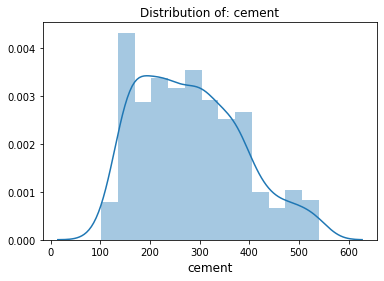

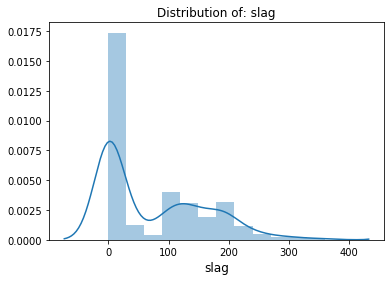

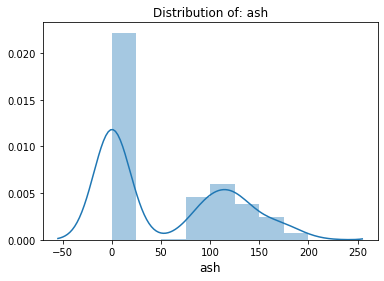

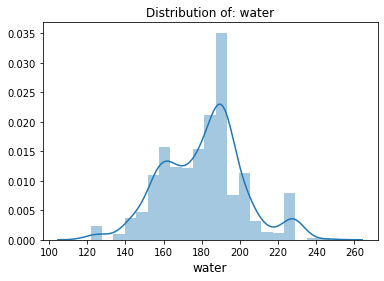

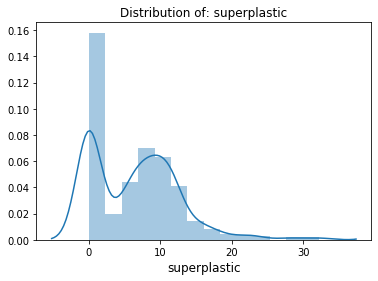

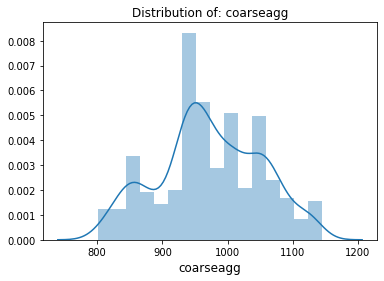

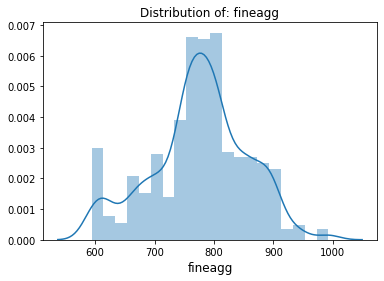

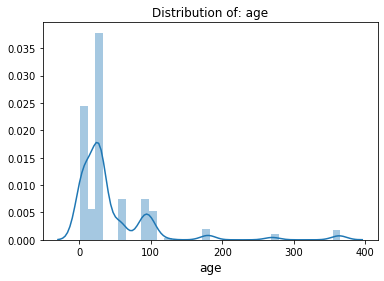

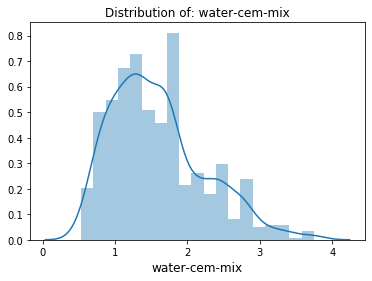

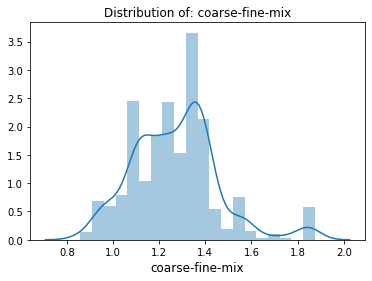

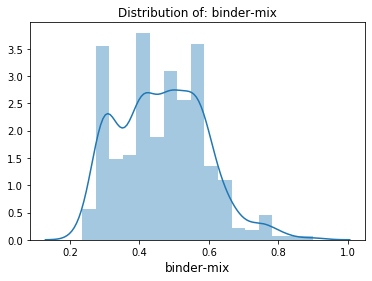

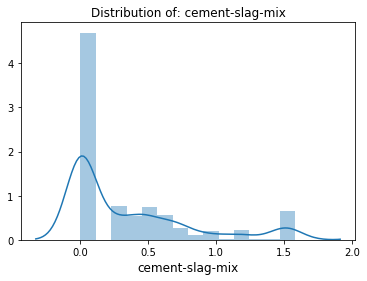

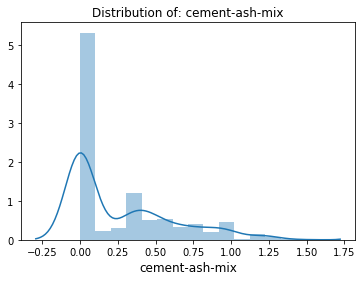

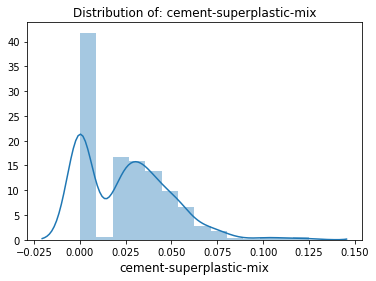

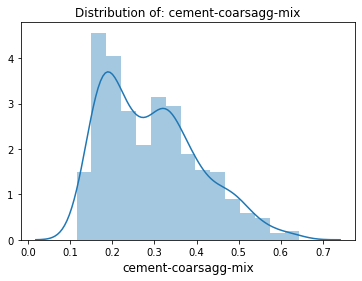

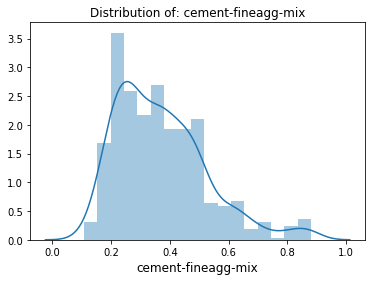

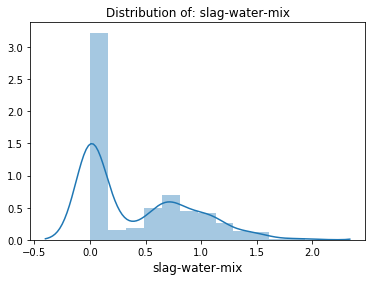

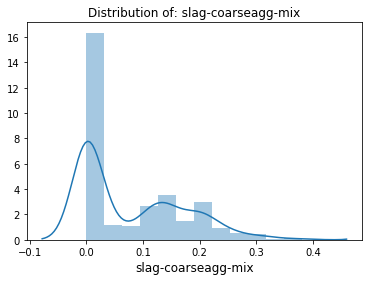

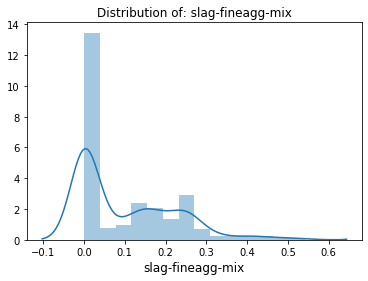

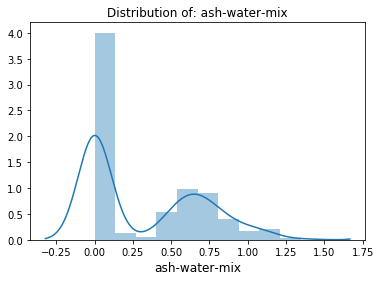

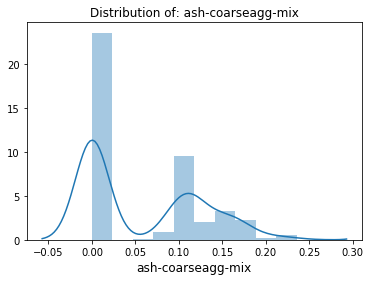

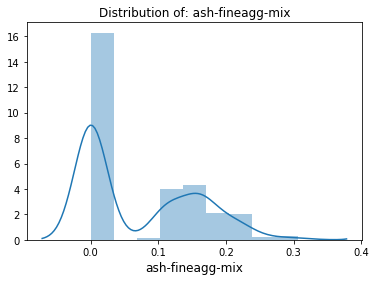

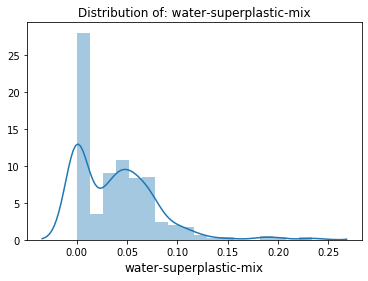

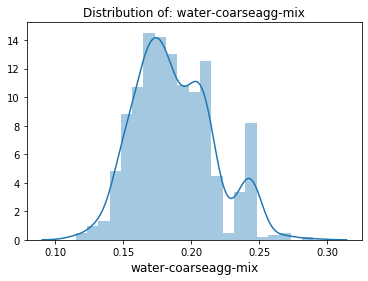

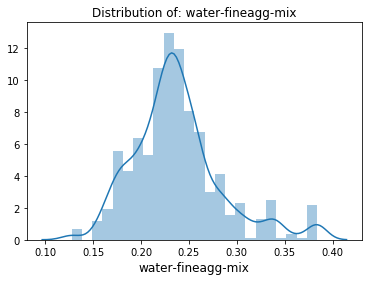

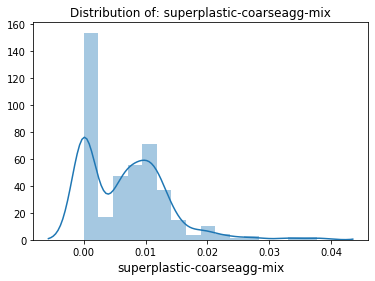

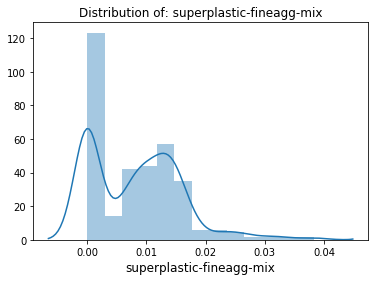

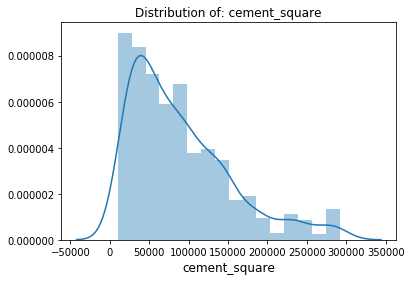

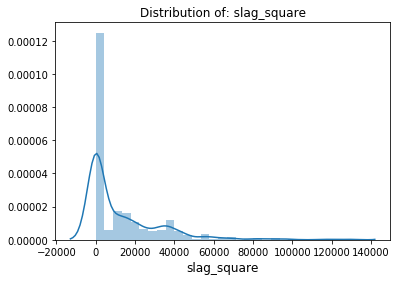

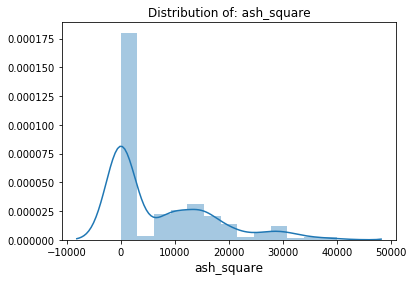

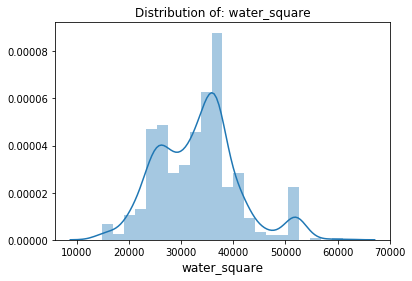

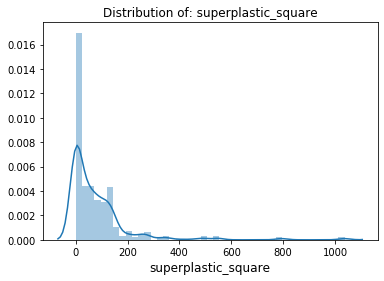

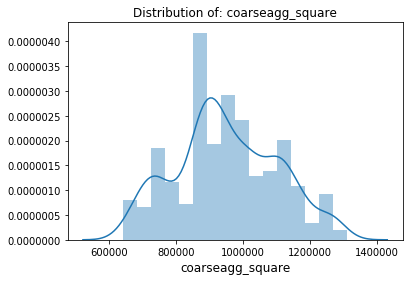

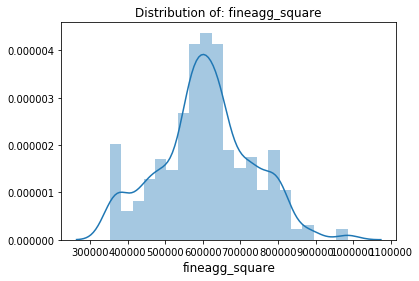

In [144]:
for i in range(len(X_train.columns)-1):
    sns.distplot(X_train[X_train.columns[i]])
    title1='Distribution of: '+X_train.columns[i]
    plt.title(title1)
    plt.xlabel(X_train.columns[i], fontsize=12)
    plt.show()

There still seem to be a large number of outliers. Hence, we will truncate the data across all the relevant dimensions

In [145]:
X_train.loc[X_train['slag'] > 260, 'slag'] = 260
X_train.loc[X_train['ash'] > 175, 'ash'] = 175
X_train.loc[X_train['water'] > 235, 'water'] = 235
X_train.loc[X_train['superplastic'] > 18, 'superplastic'] = 18
X_train.loc[X_train['fineagg'] > 915, 'fineagg'] = 915
X_train.loc[X_train['age'] > 190, 'age'] = 190
X_train.loc[X_train['coarse-fine-mix'] > 1.8, 'coarse-fine-mix'] = 1.8
X_train.loc[X_train['binder-mix'] > 0.82, 'binder-mix'] = 0.82
X_train.loc[X_train['cement-slag-mix'] > 1.2, 'cement-slag-mix'] = 1.2
X_train.loc[X_train['cement-ash-mix'] > 1.1, 'cement-ash-mix'] = 1.1
X_train.loc[X_train['cement-superplastic-mix'] > .08, 'cement-superplastic-mix'] = 0.08
X_train.loc[X_train['cement-coarsagg-mix'] > .58, 'cement-coarsagg-mix'] = 0.58
X_train.loc[X_train['cement-fineagg-mix'] > 0.7, 'cement-fineagg-mix'] = 0.7
X_train.loc[X_train['slag-water-mix'] > 1.5, 'slag-water-mix'] = 1.5
X_train.loc[X_train['slag-coarseagg-mix'] > 0.3, 'slag-coarseagg-mix'] = 0.3
X_train.loc[X_train['slag-fineagg-mix'] > 0.29, 'slag-fineagg-mix'] = 0.29
X_train.loc[X_train['ash-water-mix'] > 1.2, 'ash-water-mix'] = 1.2
X_train.loc[X_train['ash-coarseagg-mix'] > 0.18, 'ash-coarseagg-mix'] = 0.18
X_train.loc[X_train['ash-fineagg-mix'] > 0.24, 'ash-fineagg-mix'] = 0.24
X_train.loc[X_train['water-superplastic-mix'] > 0.11, 'water-superplastic-mix'] = 0.11
X_train.loc[X_train['water-coarseagg-mix'] > 0.25, 'water-coarseagg-mix'] = 0.25
X_train.loc[X_train['water-coarseagg-mix'] < 0.13, 'water-coarseagg-mix'] = 0.13
X_train.loc[X_train['water-fineagg-mix'] > 0.32, 'water-fineagg-mix'] = 0.32
X_train.loc[X_train['water-fineagg-mix'] < 0.17, 'water-fineagg-mix'] = 0.17
X_train.loc[X_train['superplastic-coarseagg-mix'] >0.15, 'superplastic-coarseagg-mix'] = 0.15
X_train.loc[X_train['superplastic-fineagg-mix'] >0.02, 'superplastic-fineagg-mix'] = 0.02

X_train.loc[X_train['slag_square'] >67600, 'slag_square'] = 67600
X_train.loc[X_train['ash_square'] >30625, 'ash_square'] = 30625
X_train.loc[X_train['water_square'] >55225, 'water_square'] = 55225
X_train.loc[X_train['superplastic_square'] >324, 'superplastic_square'] = 324
X_train.loc[X_train['fineagg_square'] >837225, 'fineagg_square'] = 837225
X_train.loc[X_train['age_square'] >36100, 'age_square'] = 36100

In [146]:
from scipy.stats import zscore
X_train_scaled=X_train.apply(zscore)
X_train_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water-cem-mix,coarse-fine-mix,...,superplastic-coarseagg-mix,superplastic-fineagg-mix,cement_square,slag_square,ash_square,water_square,superplastic_square,coarseagg_square,fineagg_square,age_square
550,-1.613376,1.200648,-0.867759,0.530463,-1.126464,-0.797071,1.489466,-0.851532,-1.529243,-1.356493,...,-1.010010,-1.159219,-1.189039,1.003326,-0.768157,0.486214,-0.831191,-0.812265,1.577659,-0.463743
974,-0.663156,-0.879450,1.869006,-1.030808,0.998807,0.913440,-0.033425,-0.288540,-0.383040,0.454339,...,0.656239,1.101057,-0.688654,-0.696855,2.513867,-1.021895,0.823475,0.907361,-0.085659,-0.364695
773,1.154445,-0.879450,-0.867759,0.292464,-1.126464,0.675656,-0.374807,-0.761454,0.858110,0.584458,...,-1.010010,-1.159219,1.093470,-0.696855,-0.768157,0.238121,-0.831191,0.654212,-0.425599,-0.458631
261,0.277319,-0.879450,-0.867759,0.530463,-1.126464,0.509463,0.703908,-0.761454,0.042369,-0.269688,...,-1.010010,-1.159219,0.098190,-0.696855,-0.768157,0.486214,-0.831191,0.479982,0.689703,-0.458631
294,-0.422433,1.029911,-0.867759,0.230585,-1.126464,0.875088,-0.510598,-0.288540,-0.473823,0.809738,...,-1.010010,-1.159219,-0.514877,0.735676,-0.768157,0.174690,-0.831191,0.866222,-0.557466,-0.364695


#### Preparing the PCA training set

In [147]:
# ADD THIS AFTER TRAIN SET IS EXTRACTED
pca7 = PCA(n_components=7)
pca7.fit(X_train)
print(pca7.components_)
print(pca7.explained_variance_ratio_)
X_train_PCA = pca7.transform(X_train)

[[-2.70591734e-05 -1.08051027e-04 -1.02823988e-05 -4.95694340e-06
  -1.01357657e-05  4.84544817e-04 -2.13633938e-04  1.71133014e-05
  -2.96714649e-07  9.84418069e-07  1.22555374e-07 -4.49209372e-07
   1.40967154e-08 -2.75571918e-08 -1.85285119e-07  5.51206211e-08
  -6.05639220e-07 -1.47941577e-07 -1.20658506e-07  1.96168317e-08
  -3.48798170e-08 -1.18442261e-08 -5.55748259e-08 -9.55059948e-08
   5.42236002e-08 -1.67436236e-08 -1.09078341e-08 -1.59780171e-02
  -1.55040446e-02 -4.70419498e-04 -2.39382641e-03 -1.55184262e-04
   9.43138582e-01 -3.31622997e-01  3.72304937e-03]
 [ 2.89461356e-04  2.72491933e-04 -5.19501786e-05  8.74041599e-05
  -4.38444895e-06 -1.67689337e-04 -6.09406845e-04  4.20729899e-05
   8.50860208e-07  8.26028263e-07 -3.95253489e-07  1.00239704e-06
  -3.16216172e-07 -2.59120290e-08  3.39382863e-07  6.56624982e-07
   1.35458473e-06  2.99043665e-07  3.97365238e-07 -4.60852739e-07
  -3.20050229e-08 -2.47768891e-08 -4.00259037e-08  1.24271280e-07
   2.75489265e-07 -3.9123

The PCA data set has very low values in its data set and hence we will ignore this data set

We will now develop all the models using both X_train_scaled only

#### Linear Regression (Linear , On X_train_scaled)

In [148]:
X_train_scaled.shape

(721, 35)

In [149]:
X_test.shape

(309, 35)

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
regression_model_linear_xtrain = LinearRegression()
regression_model_linear_xtrain.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [152]:
regression_model_linear_xtrain.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(regression_model_linear_xtrain.coef_))], axis = 1)
coefficients

,0,0
0,cement,27.171420
1,slag,6.310391
2,ash,25.529693
3,water,-18.137092
4,superplastic,10.108438
5,coarseagg,-17.389270
6,fineagg,32.950928
7,age,24.220542
8,water-cem-mix,-2.132757
9,coarse-fine-mix,8.627187


In [154]:
y_pred_linear = regression_model_linear_xtrain.predict(X_test)

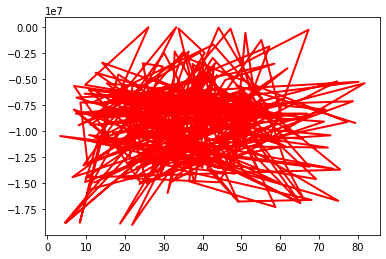

In [155]:
plt.plot(y_test, y_pred_linear, color='red', linewidth=2)
plt.show()

In [156]:
n=721
p=35
R2=r2_score(y_test, y_pred_linear,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_linear,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -339564761611.19214
Adjusted R2 score is: -356914785927.14355


In [157]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear)))

Mean Absolute Error: 9153734.454588758
Mean Squared Error: 98398741354858.05
Root Mean Squared Error: 9919613.972068572


#### Linear regression with quadratic powers

In [158]:
X_quad=X_train_scaled.iloc[:,:27].copy()
Xtest_quad=X_test.iloc[:,:27].copy()

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [160]:
poly = PolynomialFeatures(degree=2, interaction_only=True)

In [161]:
X_train_ = poly.fit_transform(X_quad)
X_test_ = poly.fit_transform(Xtest_quad)

In [162]:
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train_, y_train)
y_pred_quad = poly_clf.predict(X_test_)

In [163]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(poly_clf.coef_))], axis = 1)
coefficients

,0,0
0,cement,-1.848552e-03
1,slag,-3.275982e+06
2,ash,-6.598523e+04
3,water,2.172493e+06
4,superplastic,-6.892575e+03
5,coarseagg,9.831665e+05
6,fineagg,7.387586e+05
7,age,-5.095819e+05
8,water-cem-mix,1.360614e+01
9,coarse-fine-mix,2.299297e+06


The coeffecients are orders of magnitude larger or smaller than each other and hence, this may imply a massive overfitting. Hence, we should use regularization for the same

In [164]:
n=721
p=35
R2=r2_score(y_test, y_pred_quad,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_quad,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -2.2699818544392454e+20
Adjusted R2 score is: -2.3859663287536596e+20


In [165]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_quad))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_quad))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_quad)))

Mean Absolute Error: 199068627943.7427
Mean Squared Error: 6.577931005405257e+22
Root Mean Squared Error: 256474774693.44342


#### Linear Regression (Ridge Regularization)

In [166]:
from sklearn.linear_model import Ridge

In [167]:
rid_reg=Ridge(alpha=1040000000)
rid_reg.fit(X_train_scaled,y_train)

Ridge(alpha=1040000000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [168]:
y_pred_rid=rid_reg.predict(X_test)

In [169]:
n=721
p=35
R2=r2_score(y_test, y_pred_rid,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_rid,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.016448928848196043
Adjusted R2 score is: -0.03380550544423189


In [170]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rid))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rid))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rid)))

Mean Absolute Error: 13.292826636026538
Mean Squared Error: 285.0124583012239
Root Mean Squared Error: 16.88231199513929


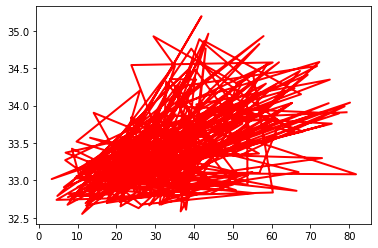

In [171]:
plt.plot(y_test, y_pred_rid, color='red', linewidth=2)
plt.show()

Using a very large alpha value in Ridge regression has significantly reduced the error of the model.

In [172]:
coefficients = pd.concat([pd.DataFrame(X_train_scaled.columns),pd.DataFrame(np.transpose(rid_reg.coef_))], axis = 1)
coefficients.columns=['Dimension','Coeffecients']
coefficients
coefficients.sort_values('Coeffecients', ascending='False')

,Dimension,Coeffecients
10,binder-mix,-6.960108e-06
3,water,-3.314514e-06
30,water_square,-3.084523e-06
6,fineagg,-2.010047e-06
12,cement-ash-mix,-1.998866e-06
33,fineagg_square,-1.955121e-06
5,coarseagg,-1.787367e-06
32,coarseagg_square,-1.722191e-06
23,water-coarseagg-mix,-1.578473e-06
29,ash_square,-1.334775e-06


#### Decision Tree Regression

In [173]:
from sklearn.tree import DecisionTreeRegressor
Decision_tree_R = DecisionTreeRegressor()

In [174]:
Decision_tree_R.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [175]:
y_pred_DT = Decision_tree_R.predict(X_test)

In [176]:
n=721
p=35
R2=r2_score(y_test, y_pred_DT,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_DT,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.37052482069116754
Adjusted R2 score is: -0.4405516363469206


In [177]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_DT))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))

Mean Absolute Error: 16.704838187702265
Mean Squared Error: 397.1493293689321
Root Mean Squared Error: 19.9286058059497


#### Support Vector Machine

In [178]:
from sklearn import svm
svr= svm.SVR()

In [179]:
svr.fit(X_train_scaled, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [180]:
y_pred_SVR=svr.predict(X_test)

In [181]:
n=721
p=35
R2=r2_score(y_test, y_pred_SVR,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_SVR,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.0024523218018537296
Adjusted R2 score is: -0.05367251342676593


In [182]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_SVR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SVR))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)))

Mean Absolute Error: 13.658353776677412
Mean Squared Error: 290.48964405267617
Root Mean Squared Error: 17.04375674705187


#### Random Forest Regression

In [183]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [184]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [185]:
y_pred_rfr=rfr.predict(X_test)

In [186]:
n=721
p=35
R2=r2_score(y_test, y_pred_rfr,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_rfr,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.06733011953436296
Adjusted R2 score is: -0.12186523513100922


In [187]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rfr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

Mean Absolute Error: 14.42973786407767
Mean Squared Error: 309.2898682233009
Root Mean Squared Error: 17.586638912063354


#### AdaBoost Regression

In [188]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

In [189]:
abr.fit(X_train_scaled, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [190]:
y_pred_abr=abr.predict(X_test)

In [191]:
n=721
p=35
R2=r2_score(y_test, y_pred_abr,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_abr,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.28047786581720846
Adjusted R2 score is: -0.34590374217283215


In [192]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_abr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_abr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_abr)))

Mean Absolute Error: 16.14999844093854
Mean Squared Error: 371.0556116923181
Root Mean Squared Error: 19.262803837767702


#### XGBoost Regression

In [193]:
from xgboost import XGBRegressor
xgb=XGBRegressor()


In [194]:
xgb.fit(X_train_scaled, y_train)

[18:19:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [195]:
y_pred_xgb=xgb.predict(X_test)

In [196]:
n=721
p=35
R2=r2_score(y_test, y_pred_xgb,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test, y_pred_xgb,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: -0.7579706089014798
Adjusted R2 score is: -0.847793924684767


In [197]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xgb))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xgb))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))

Mean Absolute Error: 19.215907828321736
Mean Squared Error: 509.42298733664614
Root Mean Squared Error: 22.570400690653372


Hence, for **the second modification**, the best model provided is:<br>
Model: **Support Vector Machines**<br>
Mean Absolute Error: 13.658353776677412<br>
Mean Squared Error: 290.48964405267617<br>
Root Mean Squared Error: 17.04375674705187<br>

Hence, we will use the second modification of our data for tuning the hyperparameters

Conclusion: On the base algorithms, SVM seems to be significantly better than the rest of the models. However, the SVM is effecient only in the rbf kernel. However, due to limitations in the scikit library, this kernel does not provide us with the coeffecients. With the linear kernel, the accuracy drops drastically as follows:
Mean Absolute Error: 1503249.2007960635
Mean Squared Error: 2365528555909.929
Root Mean Squared Error: 1538027.4886717498

Hence, the alternative fashion is to use the Ada Gradient Boost Regressor


In [198]:
weights=pd.concat([pd.DataFrame(concrete_mod2.columns),pd.DataFrame(np.transpose(abr.feature_importances_))], axis = 1)
weights.columns=['Dimension','Co-effecient']
weights.sort_values('Co-effecient',ascending='False')

,Dimension,Co-effecient
20,ash-water-mix,0.000000
4,superplastic,0.000000
29,slag_square,0.000000
11,binder-mix,0.000224
2,ash,0.000266
5,coarseagg,0.000811
19,slag-fineagg-mix,0.000940
6,fineagg,0.001274
12,cement-slag-mix,0.001653
18,slag-coarseagg-mix,0.001901


## 4. Fine tuning the parameters 

#### Split Train, Validate and Test

In [199]:
X = concrete_mod2.drop('strength', axis=1)
Y = concrete_mod2['strength']
X_dump, X_test1, y_dump, y_test1 = train_test_split(X, Y, test_size=0.15, random_state=3)
X_train1, X_validate1, y_train1, y_validate1=train_test_split(X_dump, y_dump, test_size=0.18, random_state=3)

In [200]:
X_train.shape

(721, 35)

In [201]:
# Performing truncations on the training data set

In [202]:
X_train1.loc[X_train1['slag'] > 260, 'slag'] = 260
X_train1.loc[X_train1['ash'] > 175, 'ash'] = 175
X_train1.loc[X_train1['water'] > 235, 'water'] = 235
X_train1.loc[X_train1['superplastic'] > 18, 'superplastic'] = 18
X_train1.loc[X_train1['fineagg'] > 915, 'fineagg'] = 915
X_train1.loc[X_train1['age'] > 190, 'age'] = 190
X_train1.loc[X_train1['coarse-fine-mix'] > 1.8, 'coarse-fine-mix'] = 1.8
X_train1.loc[X_train1['binder-mix'] > 0.82, 'binder-mix'] = 0.82
X_train1.loc[X_train1['cement-slag-mix'] > 1.2, 'cement-slag-mix'] = 1.2
X_train1.loc[X_train1['cement-ash-mix'] > 1.1, 'cement-ash-mix'] = 1.1
X_train1.loc[X_train1['cement-superplastic-mix'] > .08, 'cement-superplastic-mix'] = 0.08
X_train1.loc[X_train1['cement-coarsagg-mix'] > .58, 'cement-coarsagg-mix'] = 0.58
X_train1.loc[X_train1['cement-fineagg-mix'] > 0.7, 'cement-fineagg-mix'] = 0.7
X_train1.loc[X_train1['slag-water-mix'] > 1.5, 'slag-water-mix'] = 1.5
X_train1.loc[X_train1['slag-coarseagg-mix'] > 0.3, 'slag-coarseagg-mix'] = 0.3
X_train1.loc[X_train1['slag-fineagg-mix'] > 0.29, 'slag-fineagg-mix'] = 0.29
X_train1.loc[X_train1['ash-water-mix'] > 1.2, 'ash-water-mix'] = 1.2
X_train1.loc[X_train1['ash-coarseagg-mix'] > 0.18, 'ash-coarseagg-mix'] = 0.18
X_train1.loc[X_train1['ash-fineagg-mix'] > 0.24, 'ash-fineagg-mix'] = 0.24
X_train1.loc[X_train1['water-superplastic-mix'] > 0.11, 'water-superplastic-mix'] = 0.11
X_train1.loc[X_train1['water-coarseagg-mix'] > 0.25, 'water-coarseagg-mix'] = 0.25
X_train1.loc[X_train1['water-coarseagg-mix'] < 0.13, 'water-coarseagg-mix'] = 0.13
X_train1.loc[X_train1['water-fineagg-mix'] > 0.32, 'water-fineagg-mix'] = 0.32
X_train1.loc[X_train1['water-fineagg-mix'] < 0.17, 'water-fineagg-mix'] = 0.17
X_train1.loc[X_train1['superplastic-coarseagg-mix'] >0.15, 'superplastic-coarseagg-mix'] = 0.15
X_train1.loc[X_train1['superplastic-fineagg-mix'] >0.02, 'superplastic-fineagg-mix'] = 0.02

X_train1.loc[X_train1['slag_square'] >67600, 'slag_square'] = 67600
X_train1.loc[X_train1['ash_square'] >30625, 'ash_square'] = 30625
X_train1.loc[X_train1['water_square'] >55225, 'water_square'] = 55225
X_train1.loc[X_train1['superplastic_square'] >324, 'superplastic_square'] = 324
X_train1.loc[X_train1['fineagg_square'] >837225, 'fineagg_square'] = 837225
X_train1.loc[X_train1['age_square'] >36100, 'age_square'] = 36100

In [203]:
from scipy.stats import zscore
X_train_scaled1=X_train1.apply(zscore)
X_train_scaled1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water-cem-mix,coarse-fine-mix,...,superplastic-coarseagg-mix,superplastic-fineagg-mix,cement_square,slag_square,ash_square,water_square,superplastic_square,coarseagg_square,fineagg_square,age_square
588,-1.223761,1.657542,1.577570,0.943858,0.498602,-1.952505,-0.918887,-0.285515,-1.241256,-0.568460,...,0.599988,0.731673,-1.026935,1.835961,1.792144,0.934569,0.137890,-1.839937,-0.940897,-0.355006
675,-0.520786,-0.873943,1.043658,0.729357,-0.296440,0.727956,-0.214130,-0.609394,-0.653474,0.485981,...,-0.350972,-0.262077,-0.592861,-0.697196,0.794999,0.699913,-0.584227,0.709349,-0.265830,-0.431978
899,-0.677751,-0.873943,1.937209,-1.210686,0.715432,1.034987,0.015626,0.362242,-0.347144,0.485601,...,0.409370,0.783941,-0.703985,-0.697196,2.603960,-1.179867,0.415924,1.038399,-0.034860,-0.047119
411,-0.086482,-0.873943,1.092772,-0.986651,0.661224,1.036261,0.029824,1.380146,0.169773,0.475847,...,0.367709,0.724136,-0.242849,-0.697196,0.876340,-0.985100,0.343157,1.039780,-0.020411,0.851410
101,2.464453,-0.873943,-0.830580,-0.867484,-0.675891,1.054096,-1.280301,-0.285515,2.584990,1.595189,...,-0.657092,-0.611883,3.074741,-0.697196,-0.736977,-0.879128,-0.764152,1.059131,-1.267534,-0.355006


#### Regression testing using Ridge Regression

In [204]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [205]:
alpha1 = [500000000 , 750000000 , 1000000000 , 1100000000, 1300000000]

for i in range(len(alpha1)):
    rid_reg1=Ridge(alpha=alpha1[i])
    rid_reg1.fit(X_train_scaled1,y_train1)
    y_pred_rid=rid_reg1.predict(X_validate1)
    print('For alpha =', alpha1[i])
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_validate1, y_pred_rid))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_validate1, y_pred_rid))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validate1, y_pred_rid)),'\n')

For alpha = 500000000
Mean Absolute Error: 12.435564092885228
Mean Squared Error: 241.42417601792397
Root Mean Squared Error: 15.537830479765313 

For alpha = 750000000
Mean Absolute Error: 12.602756571113286
Mean Squared Error: 240.70980055562876
Root Mean Squared Error: 15.514825186112436 

For alpha = 1000000000
Mean Absolute Error: 12.732827259007314
Mean Squared Error: 242.31735948322842
Root Mean Squared Error: 15.566546164234005 

For alpha = 1100000000
Mean Absolute Error: 12.769453932022298
Mean Squared Error: 242.98311282158727
Root Mean Squared Error: 15.587915602208888 

For alpha = 1300000000
Mean Absolute Error: 12.827259169831677
Mean Squared Error: 244.19759046645584
Root Mean Squared Error: 15.626822788604722 



Hence, we can see that the errors are minimumn for alpha = 750000000. Hence, we will use this alpha for our final test set

In [206]:
rid_reg1=Ridge(alpha=750000000)
rid_reg1.fit(X_train_scaled1,y_train1)
y_pred_rid=rid_reg1.predict(X_test1)
print('For alpha =', alpha1[i])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_rid))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_rid))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_rid)),'\n')

For alpha = 1300000000
Mean Absolute Error: 12.307510236418919
Mean Squared Error: 248.2142179778552
Root Mean Squared Error: 15.754815707517979 



In [207]:
n=721
p=35
R2=r2_score(y_test1, y_pred_rid,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test1, y_pred_rid,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.02631053849870224
Adjusted R2 score is: -0.02344001792837136


The Mean squared error has dropped from 285.0124583012239 to 248.2142179778552 which shows an improvement of 13%

#### Decision Trees

In [208]:
max_depths = [9,12,15,18,21,24,27,30]

In [209]:
for i in max_depths:
    Dt_hype = DecisionTreeRegressor(max_depth=i)
    Dt_hype.fit(X_train1,y_train1)
    y_pred_dt_hype=Dt_hype.predict(X_validate1)
    print('For max_depth =', i)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_validate1, y_pred_dt_hype))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_validate1, y_pred_dt_hype))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validate1, y_pred_dt_hype)),'\n')

For max_depth = 9
Mean Absolute Error: 5.3509071664722665
Mean Squared Error: 53.295684687594466
Root Mean Squared Error: 7.300389351780798 

For max_depth = 12
Mean Absolute Error: 4.732756219518877
Mean Squared Error: 45.71354382335095
Root Mean Squared Error: 6.7611791740310325 

For max_depth = 15
Mean Absolute Error: 5.083427215189873
Mean Squared Error: 51.30693100158228
Root Mean Squared Error: 7.162885661629835 

For max_depth = 18
Mean Absolute Error: 4.9998154008438815
Mean Squared Error: 48.57496304940225
Root Mean Squared Error: 6.969574093831147 

For max_depth = 21
Mean Absolute Error: 4.974936708860759
Mean Squared Error: 50.95332499999999
Root Mean Squared Error: 7.13815977686126 

For max_depth = 24
Mean Absolute Error: 4.811170886075949
Mean Squared Error: 45.28563750000001
Root Mean Squared Error: 6.7294604167050425 

For max_depth = 27
Mean Absolute Error: 5.264050632911393
Mean Squared Error: 55.78623006329114
Root Mean Squared Error: 7.469018011980634 

For max_de

The lowest mean squared error is 48.84157863924051 at a max_depth of 24. We will now deploy this hyperparameter to our model

In [210]:
Dt_hype = DecisionTreeRegressor(max_depth=24)
Dt_hype.fit(X_train1,y_train1)
y_pred_dt_hype=Dt_hype.predict(X_test1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_dt_hype))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_dt_hype))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_dt_hype)),'\n')

Mean Absolute Error: 4.355774193548387
Mean Squared Error: 43.23093790322581
Root Mean Squared Error: 6.5750237948790575 



In [211]:
n=721
p=35
R2=r2_score(y_test1, y_pred_dt_hype,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test1, y_pred_dt_hype,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.8304145951423967
Adjusted R2 score is: 0.8217496474489425


The mean squared error has dropped from 306.4218951456311 to 38.089179354838706 - an almost 87.6% reduction in the error

#### Support Vector Machines

In [212]:
gamma1 = [0.001 , 0.01, 0.1, 1, 10, 100, 1000]
c1 = [0.001 , 0.01, 0.1, 1, 10, 100, 1000]
for i in gamma1:
    for j in c1:
        svm_r_hype=svm.SVR(gamma=i, C=j)
        svm_r_hype.fit(X_train1,y_train1)
        y_pred_SVM_h=svm_r_hype.predict(X_validate1)
        print('for gamma=',i,'and c= ',j)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_validate1, y_pred_SVM_h))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_validate1, y_pred_SVM_h))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validate1, y_pred_SVM_h)),'\n')

for gamma= 0.001 and c=  0.001
Mean Absolute Error: 13.070796945518387
Mean Squared Error: 251.69325653539738
Root Mean Squared Error: 15.864843413516484 

for gamma= 0.001 and c=  0.01
Mean Absolute Error: 13.070564391892725
Mean Squared Error: 251.68281168107563
Root Mean Squared Error: 15.86451422770567 

for gamma= 0.001 and c=  0.1
Mean Absolute Error: 13.06276601967447
Mean Squared Error: 251.4966921071867
Root Mean Squared Error: 15.858647234464442 

for gamma= 0.001 and c=  1
Mean Absolute Error: 13.003417937443846
Mean Squared Error: 249.7624213784477
Root Mean Squared Error: 15.8038736194152 

for gamma= 0.001 and c=  10
Mean Absolute Error: 12.647017737246324
Mean Squared Error: 239.55971102334885
Root Mean Squared Error: 15.477716595911325 

for gamma= 0.001 and c=  100
Mean Absolute Error: 12.567743154744893
Mean Squared Error: 236.06523883483416
Root Mean Squared Error: 15.364414692230685 

for gamma= 0.001 and c=  1000
Mean Absolute Error: 12.56774416958766
Mean Squared 

We have two sets of hyper parameters with approximately the lowest mean squared errors. These are:<br>
for gamma= 0.001 and c=  100<br>
Mean Absolute Error: 12.567743154744893<br>
Mean Squared Error: 236.06523883483416<br>
Root Mean Squared Error: 15.364414692230685<br> 
<br>
for gamma= 0.001 and c=  1000<br>
Mean Absolute Error: 12.56774416958766<br>
Mean Squared Error: 236.06525307764332<br>
Root Mean Squared Error: 15.364415155730573 

In [213]:
svm_r_hype=svm.SVR(gamma=0.001, C=100)
svm_r_hype.fit(X_train1,y_train1)
y_pred_SVM_h=svm_r_hype.predict(X_test1)
print('for gamma=',i,'and c= ',j)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_SVM_h))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_SVM_h))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_SVM_h)),'\n')

for gamma= 1000 and c=  1000
Mean Absolute Error: 11.77977002782072
Mean Squared Error: 229.01798909960883
Root Mean Squared Error: 15.133340315330546 



In [214]:
n=721
p=35
R2=r2_score(y_test1, y_pred_SVM_h,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test1, y_pred_SVM_h,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.1016130973593028
Adjusted R2 score is: 0.055710116932405906


In [215]:
svm_r_hype=svm.SVR(gamma=0.001, C=1000)
svm_r_hype.fit(X_train1,y_train1)
y_pred_SVM_h=svm_r_hype.predict(X_test1)
print('for gamma=',i,'and c= ',j)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_SVM_h))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_SVM_h))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_SVM_h)),'\n')

for gamma= 1000 and c=  1000
Mean Absolute Error: 11.779770605057596
Mean Squared Error: 229.01800084094359
Root Mean Squared Error: 15.133340703259924 



Hence, the best value of the Mean Square Error is 229.01798909960883 <br>
Gamma of 1000 <br>
C of 1000 <br>
This is a drop from the original value of 290.48964405267617 -  a drop of 21.2% in the mean square error

In [168]:
n_estimators1 = [200,500,800,1200, 1600, 2000]
max_features1=['auto']
max_depth1 = [10,50,90, 120,160, 200]
min_samples_split1 = [2, 5, 10]
min_samples_leaf1 = [1, 2, 4]
bootstrap1=['true']
rms1=1000
for i in n_estimators1:
    for j in max_features1:
        for k in max_depth1:
            for l in min_samples_split1:
                for m in min_samples_leaf1:
                    for n in bootstrap1:
                        rfr_hype=RandomForestRegressor(n_estimators=i,max_features=j, max_depth=k,min_samples_split=l,min_samples_leaf=m,bootstrap=n)
                        rfr_hype.fit(X_train1,y_train1)
                        y_pred_ref_hype=rfr_hype.predict(X_validate1)
#                         print('for n_estimators=',i,'and max_features= ',j,'and max_depth= ',k,'and min_samples_split= ',l,'and min_samples_leaf= ',m,'and bootstrap= ',n)
#                         print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_SVM_h))
#                         print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_SVM_h))  
#                         print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_SVM_h)),'\n')
                        rms=metrics.mean_squared_error(y_validate1, y_pred_ref_hype)
                        if(rms<rms1):
                            rms1=rms
                            lowest_n_estimators=i
                            lowest_max_features=j
                            lowest_max_depth=k
                            lowest_min_samples_split=l
                            lowest_min_samples_leaf=m
                            lowest_bootstrap=n
print('The best Mean square value is:',rms1,'with the following hyperparameters:')
print('n_estimators:',lowest_n_estimators)
print('max_features:',lowest_max_features)
print('max_depth:',lowest_max_depth)
print('min_samples_split:',lowest_min_samples_split)
print('min_samples_leaf:',lowest_min_samples_leaf)
print('bootstrap:',lowest_bootstrap)

The best Mean square value is: 24.859240152785862 with the following hyperparameters:
n_estimators: 200
max_features: auto
max_depth: 120
min_samples_split: 2
min_samples_leaf: 1
bootstrap: true


In [169]:
rfr_hype_test=RandomForestRegressor(n_estimators=lowest_n_estimators,max_features=lowest_max_features, max_depth=lowest_max_depth,min_samples_split=lowest_min_samples_split,min_samples_leaf=lowest_min_samples_leaf,bootstrap=lowest_bootstrap)
rfr_hype_test.fit(X_train1, y_train1)
y_pred_rfr_hype_t=rfr_hype_test.predict(X_test1)
print('for n_estimators=',i,'and max_features= ',j,'and max_depth= ',k,'and min_samples_split= ',l,'and min_samples_leaf= ',m,'and bootstrap= ',n)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_rfr_hype_t))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_rfr_hype_t))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_rfr_hype_t)),'\n')

for n_estimators= 2000 and max_features=  auto and max_depth=  200 and min_samples_split=  10 and min_samples_leaf=  4 and bootstrap=  true
Mean Absolute Error: 3.247928262672818
Mean Squared Error: 20.170468713151767
Root Mean Squared Error: 4.4911544966914425 



Previous Mean Square Errors (without tuning hyperparameters): 375.58304362297747<br>
Current Mean Square Errors (Post tuning hyperparameters): 20.170468713151767<br>
Decrease in Mean Square Errors (%) : 94.6<br>

#### Ada Boost

In [216]:
n_estimators2 = [50, 100]
learning_rate2 = [0.01,0.05,0.1,0.3,1]
loss2 = ['linear', 'square', 'exponential']

In [217]:
for i in n_estimators2:
    for j in learning_rate2:
        for k in loss2:
            abr_hype=AdaBoostRegressor(n_estimators=i,learning_rate=j,loss=k)
            abr_hype.fit(X_train1,y_train1)
            y_pred_abr_h=abr_hype.predict(X_validate1)
            print('for n_estimators=',i,'and learning_rate= ',j,'and loss= ',k)
            print('Mean Absolute Error:', metrics.mean_absolute_error(y_validate1, y_pred_abr_h))
            print('Mean Squared Error:', metrics.mean_squared_error(y_validate1, y_pred_abr_h))  
            print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validate1, y_pred_abr_h)),'\n')

for n_estimators= 50 and learning_rate=  0.01 and loss=  linear
Mean Absolute Error: 6.558754709210232
Mean Squared Error: 75.03499570891479
Root Mean Squared Error: 8.662274280402047 

for n_estimators= 50 and learning_rate=  0.01 and loss=  square
Mean Absolute Error: 6.5377697254689355
Mean Squared Error: 75.04416366421549
Root Mean Squared Error: 8.6628034529369 

for n_estimators= 50 and learning_rate=  0.01 and loss=  exponential
Mean Absolute Error: 6.463115649869657
Mean Squared Error: 73.86077394737727
Root Mean Squared Error: 8.594229107219405 

for n_estimators= 50 and learning_rate=  0.05 and loss=  linear
Mean Absolute Error: 6.085442468278747
Mean Squared Error: 66.92075167666682
Root Mean Squared Error: 8.180510477755458 

for n_estimators= 50 and learning_rate=  0.05 and loss=  square
Mean Absolute Error: 6.37194057503202
Mean Squared Error: 71.67204888602492
Root Mean Squared Error: 8.465934613852443 

for n_estimators= 50 and learning_rate=  0.05 and loss=  exponentia

The minimum mean squared error is:<br>
for n_estimators= 50 and learning_rate=  1 and loss=  exponential<br>
Mean Absolute Error: 5.6727519017666435<br>
Mean Squared Error: 53.482354130251245<br>
Root Mean Squared Error: 7.313163072860556 <br>

In [218]:
### On test set
abr_hype=AdaBoostRegressor(n_estimators=50,learning_rate=1,loss='exponential')
abr_hype.fit(X_train1,y_train1)
y_pred_abr_t_h=abr_hype.predict(X_test1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_abr_t_h))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_abr_t_h))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_abr_t_h)),'\n')

Mean Absolute Error: 5.683658375558439
Mean Squared Error: 47.181580834771665
Root Mean Squared Error: 6.86888497754706 



In [219]:
n=721
p=35
R2=r2_score(y_test1, y_pred_abr_t_h,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test1, y_pred_abr_t_h,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.8149170969735207
Adjusted R2 score is: 0.8054603063079341


Previous Mean Square Errors (without tuning hyperparameters):376.09551130669655<br>
Current Mean Square Errors (Post tuning hyperparameters): 45.77099048848083<br>
Decrease in Mean Square Errors (%) :87.8<br>

#### XG Gradient Boost

In [220]:
max_depth = [9, 10, 11, 12]
min_child_weight = [5,6,7,8]
for i in max_depth:
    for j in min_child_weight:
        xgb_hype=XGBRegressor(max_depth=i, min_child_weight=j)
        xgb_hype.fit(X_train1,y_train1)
        y_pred_xgb_h=xgb_hype.predict(X_validate1)
        print('for max_depth=',i,'and min_child_weight= ',j)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_validate1, y_pred_xgb_h))
        print('Mean Squared Error:', metrics.mean_squared_error(y_validate1, y_pred_xgb_h))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validate1, y_pred_xgb_h)),'\n')

[18:20:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
for max_depth= 9 and min_child_weight=  5
Mean Absolute Error: 3.0021459819697127
Mean Squared Error: 18.758260724505522
Root Mean Squared Error: 4.331080780187033 

[18:20:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
for max_depth= 9 and min_child_weight=  6
Mean Absolute Error: 3.029572042513497
Mean Squared Error: 19.46571923435824
Root Mean Squared Error: 4.411997193376061 

[18:20:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
for max_depth= 9 and min_child_weight=  7
Mean Absolute Error: 3.0012650985959213
Mean Squared Error: 19.143441805806575
Root Mean Squared Error: 4.375321908820719 

[18:21:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
for max_depth= 9 and min_child_weight=  

The hyperparameters that give us the least mean squared error is:<br>
for max_depth= 9 and min_child_weight=  5<br>
Mean Absolute Error: 3.0021459819697127<br>
Mean Squared Error: 18.758260724505522<br>
Root Mean Squared Error: 4.331080780187033 <br>

In [221]:
###On Test Set
xgb_hype_t=XGBRegressor(max_depth=9,min_child_weight=5)
xgb_hype_t.fit(X_train1,y_train1)
y_pred_xgb_t_h=xgb_hype_t.predict(X_test1)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred_xgb_t_h))
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred_xgb_t_h))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred_xgb_t_h)),'\n')

[18:21:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 2.8206354173229586
Mean Squared Error: 16.197050848164725
Root Mean Squared Error: 4.02455598149221 



In [222]:
n=721
p=35
R2=r2_score(y_test1, y_pred_xgb_t_h,multioutput='variance_weighted')
adj_R2=1-((1-R2)*(n-1)/(n-p-1))
print('R2 score is:',r2_score(y_test1, y_pred_xgb_t_h,multioutput='variance_weighted'))
print('Adjusted R2 score is:', adj_R2)

R2 score is: 0.9364625530046564
Adjusted R2 score is: 0.9332161141070842


Previous Mean Square Errors (without tuning hyperparameters):16.197050848164725<br>
Current Mean Square Errors (Post tuning hyperparameters): 509.42298733664614<br>
Decrease in Mean Square Errors (%) :96.8<br>

Hence, our best model for modelling the concrete strengths seems to be the XGBoost model with a mean squared error of 16.197050848164725. We will further try to squeeze some additional performance from this model using a RandomSearch CV

#### RandomSearch CV with K-folds

In [223]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [224]:
xgboost1=XGBRegressor()

In [225]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5,9,11,13],
        'learning_rate': [0.1 ,0.5 ,1],
        'n_estimators': [20,30,50]
        }
folds=5
param_comb = 10

In [226]:
xgb_rscv = XGBRegressor()

In [227]:
random_search = RandomizedSearchCV(xgb_rscv , param_distributions=params, n_iter=param_comb, cv = folds,random_state=33)

In [228]:
random_search.fit(X_train_scaled, y_train)

[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:21:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                                          verbosity=1),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
 

In [229]:
print('The best parameters for the XGBoost algorithm is: ',random_search.best_params_)
print('The best score for the XGBoost algorithm is: ',random_search.best_score_)

The best parameters for the XGBoost algorithm is:  {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 2, 'colsample_bytree': 0.8}
The best score for the XGBoost algorithm is:  0.9145561597221821


In [230]:
xgb_rscv1=XGBRegressor(learning_rate=1, n_estimators=600, subsample=0.6,min_child_weight=1, max_depth=9,gamma=1,colsample_bytree=0.8)

In [231]:
xgb_rscv1.fit(X_train_scaled, y_train)

[18:21:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=1,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.6, verbosity=1)

In [232]:
y_predict_xgb_rscv=xgb_rscv1.predict(X_test)

In [233]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_xgb_rscv))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_xgb_rscv))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_xgb_rscv)),'\n')

Mean Absolute Error: 15.649826403374037
Mean Squared Error: 365.03330350615647
Root Mean Squared Error: 19.10584474725356 



#### Obtaining the confidence levels from the Randomized Search CV below

In [234]:
import math
error1 = 1-random_search.best_score_
t2=1.96*math.sqrt((error1 * (1 - error1)) / 1031)
upper_bound = error1+t2
lower_bound = error1-t2
if lower_bound<0:
    lower_bound=0
print("There is a 95% likelihood that the confidence interval [",lower_bound,' - ',upper_bound,'] covers the true classification error of the model')

There is a 95% likelihood that the confidence interval [ 0.06838017560215708  -  0.10250750495347878 ] covers the true classification error of the model


### RandomizedSearch CV outcome - There is a 95% likelihood that the confidence interval [ 0.06838017560215708  -  0.10250750495347878 ] covers the true regression error of the model

#### Obtaining the confidence levels from the optimized XGBoost model from the hyperparameter_analysis

In [235]:
from numpy import sum as arraysum
from math import sqrt

In [236]:
sum_errs = arraysum((y_test1 - y_pred_xgb_t_h)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)

In [237]:
#xgb_hype_t.score(y_pred_xgb_t_h,y_test1)
score_XGB_hype=r2_score(y_pred_xgb_t_h,y_test1, multioutput='variance_weighted')

In [238]:
error1 = 1-score_XGB_hype
t2=1.96*math.sqrt((error1 * (1 - error1)) / 1031)
upper_bound = error1+t2
lower_bound = error1-t2
if lower_bound<0:
    lower_bound=0
print("There is a 95% likelihood that the confidence interval [",lower_bound,' - ',upper_bound,'] covers the true classification error of the model')

There is a 95% likelihood that the confidence interval [ 0.05296331749175632  -  0.0837744745557276 ] covers the true classification error of the model


### Hyperparameter Tuning Outcome - There is a 95% likelihood that the confidence interval [ 0.05296331749175632  -  0.0837744745557276 ] covers the true classification error of the model